# **Coffee Health Analysis**

# **Environment Setup:**

In [127]:
# datasets to be used: "coffee-health.csv"
# objective: predict airbnb prices from different factors such as location, ratings, property type, etc.
# upload datasets to a folder in Google Drive, e.g., My Drive/Colab Data
# connect to Google Drive, path tq-o datasets is "/content/drive/My Drive/Colab Data/..."
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
# import required visualization packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Global Coffee Health Dataset:**

In [129]:
# Global Coffee Health Dataset - coffee-health.csv

# load data as a Dataframe
coffee_df = pd.read_csv('/content/drive/My Drive/Colab Data/coffee-health.csv')

# check if data is correctly loaded
coffee_df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


# **Description of Data:**

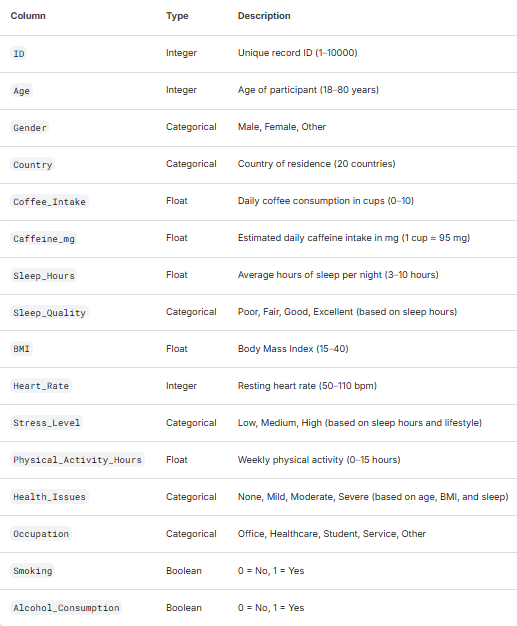

Sleep_Quality is derived from Sleep_Hours and Stress_Level is partially derived from Sleep_Hours and lifestyle so we have to be careful when modeling them later.

In [130]:
# print a concise summary of the Dataframe
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

Health Issues is the only column containing null values.

# **Preprocessing:**

In [131]:
# replace null values in Health_Issues with 'None'

coffee_mdf = coffee_df.fillna('None')
coffee_mdf.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,None,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,None,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [132]:
# new summary of data
coffee_mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            10000 non-null  object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

New summary has no null values!

In [133]:
# create a column displaying whether the person drank a low, moderate, or high amount of caffeine

def categorize_caffeine(caffeine_mg):
  if caffeine_mg < 200:
    return 'Low'
  elif 200 <= caffeine_mg <= 400:
    return 'Moderate'
  else:
    return 'High'

coffee_mdf['Caffeine_Dose'] = coffee_mdf['Caffeine_mg'].apply(categorize_caffeine)

coffee_mdf.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption,Caffeine_Dose
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,None,Other,0,0,Moderate
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,None,Service,0,0,Low
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0,High
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0,Moderate
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1,Moderate


To better understand the relationship between caffeine consumption and other factors, a new categorical variable called `Caffeine_Dose` is created. This variable categorizes the `Caffeine_mg` (caffeine in milligrams) into three levels:

*   **Low:** Less than 200 mg
*   **Moderate:** Between 200 mg and 400 mg (inclusive)
*   **High:** More than 400 mg

This categorization allows for easier analysis and visualization of how different levels of caffeine intake relate to other characteristics in the dataset.

# **Heat Map:**

Now we are going to create a heat map to help visualize the relationships between the numerical and binary variables of our dataset.

In [134]:
# dataframe with only metric and binary columns

coffee_ndf = coffee_mdf.select_dtypes(include=np.number).drop("ID", axis=1)

In [135]:
# correlation table for the quantitative variables
# the corr() method creates a new dataframe containing the correlation matrix
corr_mat = coffee_ndf.corr()
corr_mat

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
Age,1.000000,-0.012155,-0.011797,0.005010,0.008627,-0.000197,0.005931,-0.013565,0.000998
Coffee_Intake,-0.012155,1.000000,0.999814,-0.190291,-0.008330,0.060123,0.004782,0.010836,-0.007798
Caffeine_mg,-0.011797,0.999814,1.000000,-0.190493,-0.008706,0.060027,0.005026,0.010829,-0.008018
Sleep_Hours,0.005010,-0.190291,-0.190493,1.000000,0.008463,-0.036219,-0.011228,0.007955,-0.003375
BMI,0.008627,-0.008330,-0.008706,0.008463,1.000000,-0.009362,0.002042,0.015319,-0.006537
Heart_Rate,-0.000197,0.060123,0.060027,-0.036219,-0.009362,1.000000,-0.002919,0.006534,-0.009474
Physical_Activity_Hours,0.005931,0.004782,0.005026,-0.011228,0.002042,-0.002919,1.000000,-0.007314,-0.019156
Smoking,-0.013565,0.010836,0.010829,0.007955,0.015319,0.006534,-0.007314,1.000000,-0.011769
Alcohol_Consumption,0.000998,-0.007798,-0.008018,-0.003375,-0.006537,-0.009474,-0.019156,-0.011769,1.000000


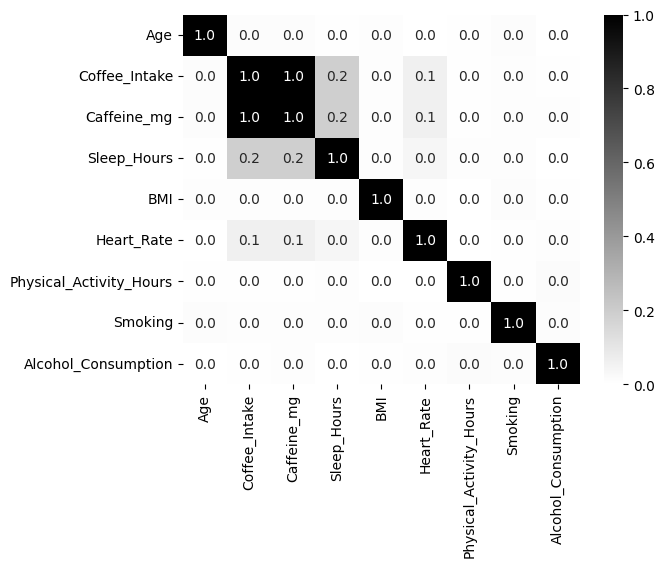

In [136]:
# heat map for interpretability
sns.heatmap(np.absolute(corr_mat), annot=True, fmt=".1f", vmin=0, vmax=1, cmap="gray_r");
plt.show()

No strong correlation between any of the numerical variables, perhaps visualizing the data will provide more insights, especially when we consider non-metric variables

# **Data Visualization:**

In [137]:
sns.set_palette("deep")

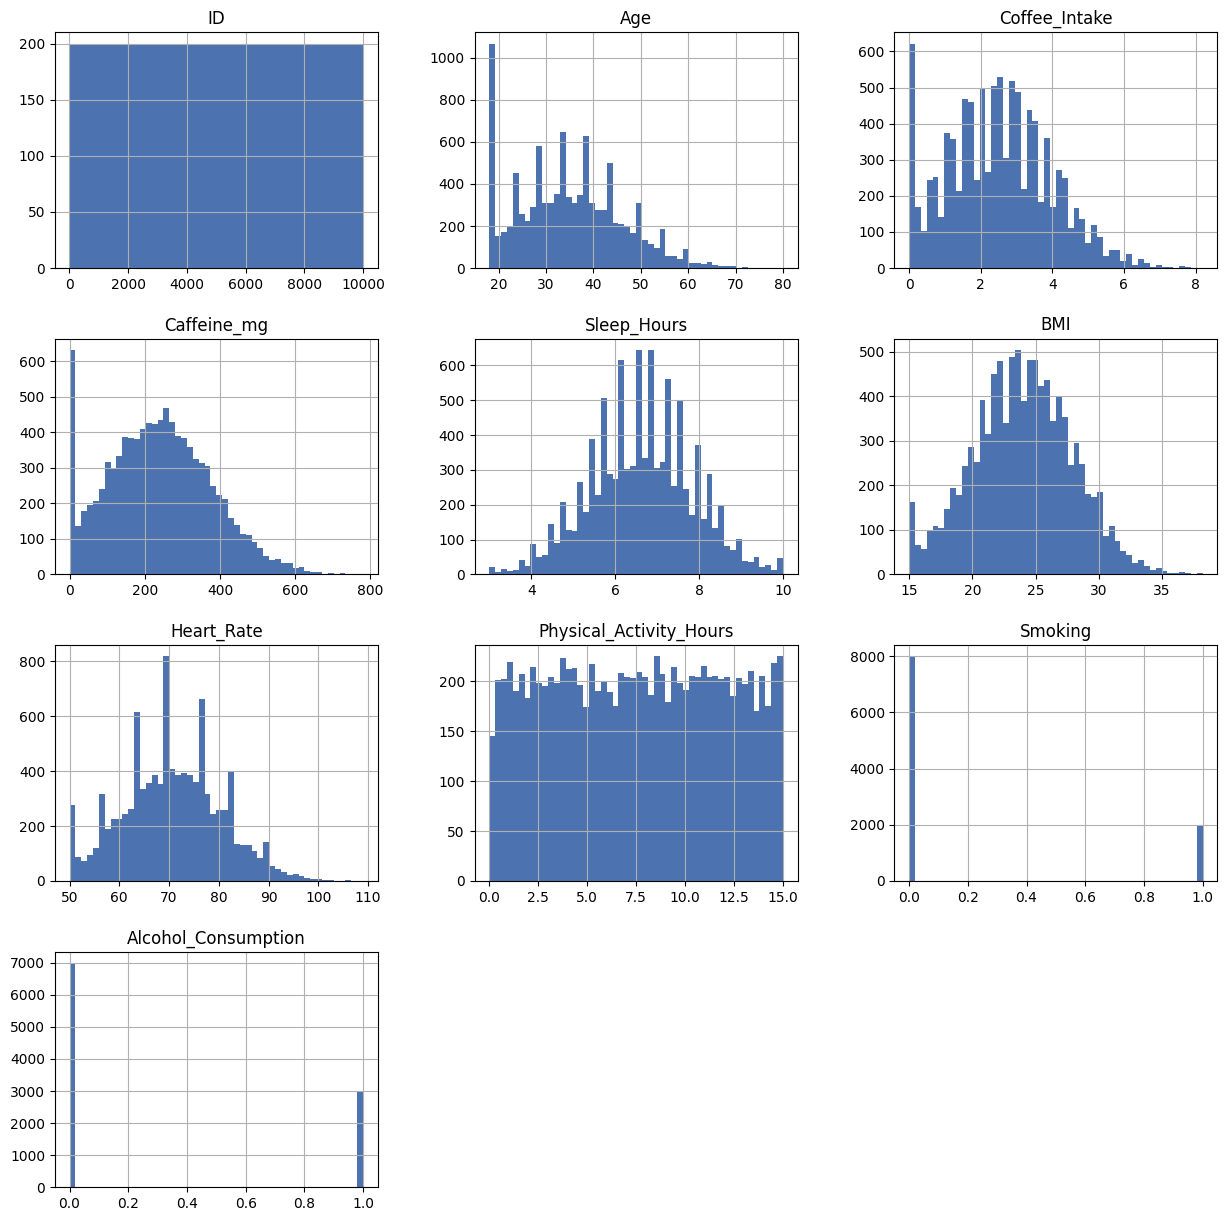

In [138]:
coffee_mdf.hist(bins=50, figsize=(15,15))
plt.show()

## **Coffee, Sleep, and Stress**

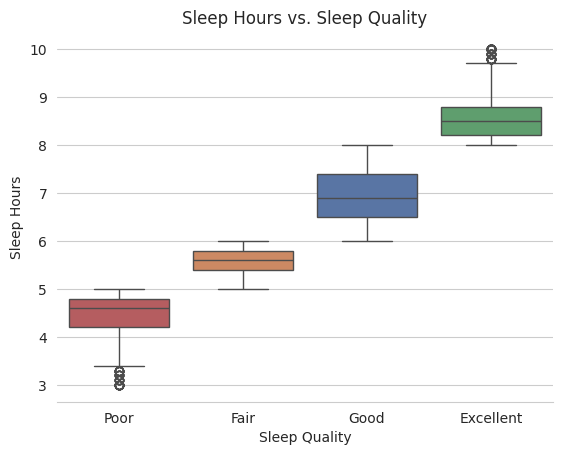

In [140]:
plt.figure()
# barchart comparing "Sleep_hours and "Sleep_Quality"
with sns.axes_style("whitegrid"):
  ax = sns.boxplot(data=coffee_mdf, x = "Sleep_Quality", y = "Sleep_Hours", order=["Poor", "Fair", "Good", "Excellent"], hue="Sleep_Quality", legend=False)
  sns.despine(left=True)
  plt.xlabel("Sleep Quality")
  plt.ylabel("Sleep Hours")
  plt.title("Sleep Hours vs. Sleep Quality")
plt.show()

Poor < 5 hours

5 hours < Fair < 6 hours

6 hours < Good < 8 hours

8 hours < Excellent

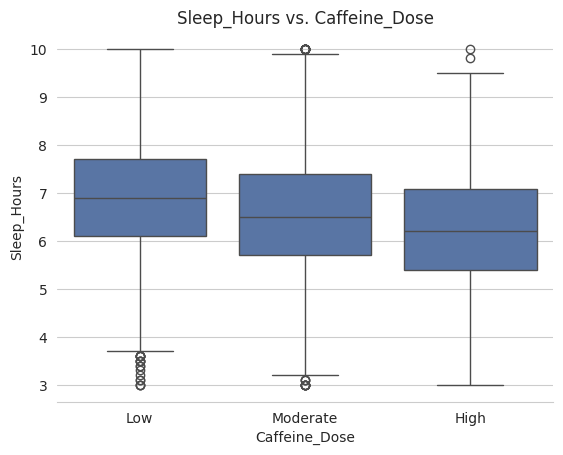

In [141]:
plt.figure()
# boxplot comparing the amount of Sleep_Hours vs. "Caffeine Dose"
with sns.axes_style("whitegrid"):
  ax = sns.boxplot(data=coffee_mdf, x = "Caffeine_Dose", y = "Sleep_Hours", order=['Low', 'Moderate', 'High'])
  sns.despine(left=True)
  plt.title("Sleep_Hours vs. Caffeine_Dose")
plt.show()

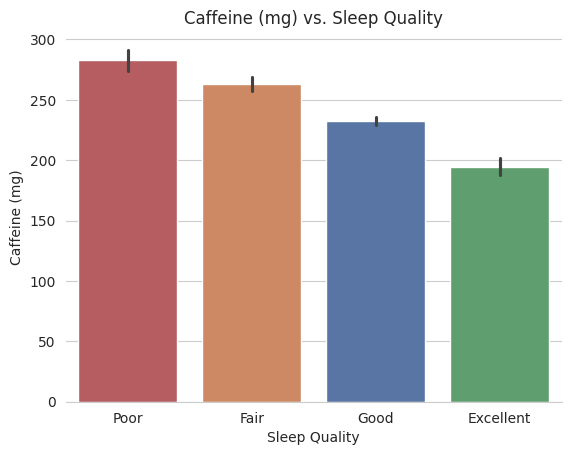

In [142]:
plt.figure()
# barchart comparing "Caffeine_mg" and "Sleep_Quality"
with sns.axes_style("whitegrid"):
  ax = sns.barplot(data=coffee_mdf, x = "Sleep_Quality", y = "Caffeine_mg", order=["Poor", "Fair", "Good", "Excellent"], hue="Sleep_Quality", legend=False)
  sns.despine(left=True)
  plt.xlabel("Sleep Quality")
  plt.ylabel("Caffeine (mg)")
  plt.title("Caffeine (mg) vs. Sleep Quality")
plt.show()

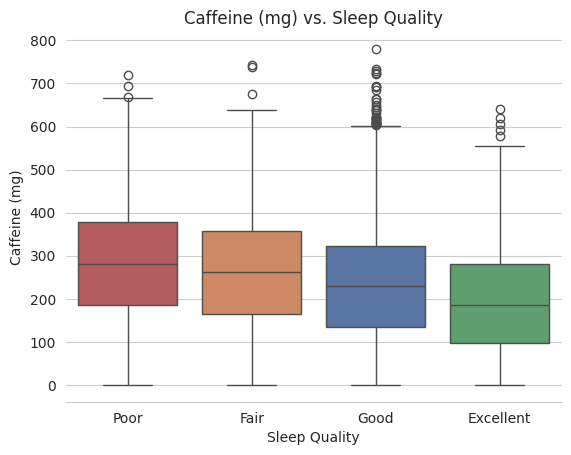

In [143]:
plt.figure()
# boxplot comparing "Caffeine_mg" and "Sleep_Quality"
with sns.axes_style("whitegrid"):
  sns.boxplot(data=coffee_mdf, x = "Sleep_Quality", y = "Caffeine_mg", order=["Poor", "Fair", "Good", "Excellent"], hue="Sleep_Quality", legend=False)
  sns.despine(left=True)
  plt.xlabel("Sleep Quality")
  plt.ylabel("Caffeine (mg)")
  plt.title("Caffeine (mg) vs. Sleep Quality")
plt.show()

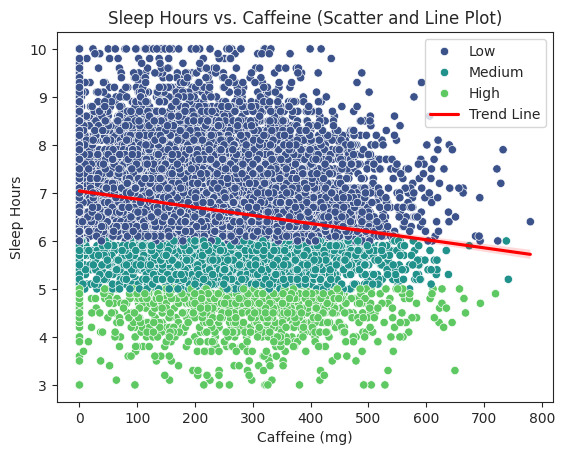

In [144]:
# Create a scatter plot
plt.figure()
with sns.axes_style("ticks"):
  sns.scatterplot(data=coffee_mdf, x="Caffeine_mg", y="Sleep_Hours", palette = "viridis", hue="Stress_Level")

  # Create a line plot (e.g., to show a trend)
  sns.regplot(data=coffee_mdf, x="Caffeine_mg", y="Sleep_Hours", scatter=False, color='red', label="Trend Line")

  plt.title("Sleep Hours vs. Caffeine (Scatter and Line Plot)")
  plt.xlabel("Caffeine (mg)")
  plt.ylabel("Sleep Hours")
  plt.legend()
plt.show()

Seems to be atleast some correlation between quality of sleep and amount of caffeine.

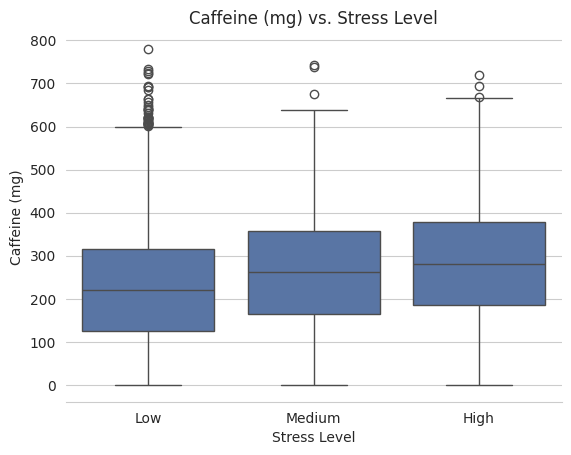

In [145]:
plt.figure()
# boxplot comparing "Caffeine_mg" and "Stress_Level"
with sns.axes_style("whitegrid"):
  ax = sns.boxplot(data=coffee_mdf, x = "Stress_Level", y = "Caffeine_mg")
  sns.despine(left=True)
  plt.xlabel("Stress Level")
  plt.ylabel("Caffeine (mg)")
  plt.title("Caffeine (mg) vs. Stress Level")
plt.show()

Some correlation between stress level and caffeine amount.

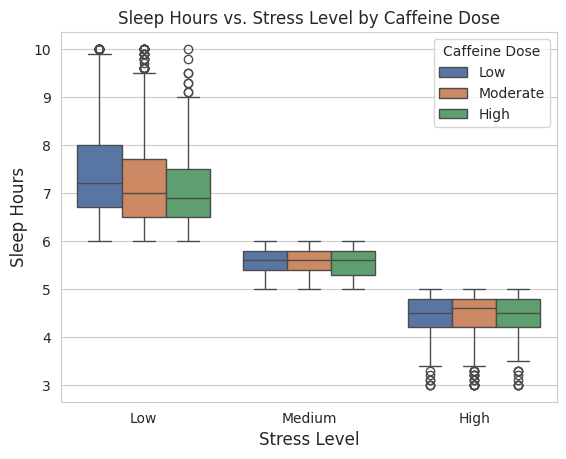

In [146]:
# boxplot comparing Sleep_Hours and Stress_Level with different doses of caffeine
with sns.axes_style("whitegrid"):
  ax = sns.boxplot(data=coffee_mdf, x = "Stress_Level", y = "Sleep_Hours", hue="Caffeine_Dose", hue_order=['Low', 'Moderate', 'High'])
  plt.xlabel("Stress Level", fontsize=12)
  plt.ylabel("Sleep Hours", fontsize=12)
  plt.legend(title="Caffeine Dose")
  plt.title("Sleep Hours vs. Stress Level by Caffeine Dose")
plt.show()

Per the description of the data: "Stress_Level" is based on "Sleep_Hours".

## **Health and Lifestyle Outcomes**

/tmp/ipython-input-2418068897.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coffee_mdf, x="Caffeine_mg", y="Country", order=country_caffeine_order, palette="Greens_d", ax = axes[1])


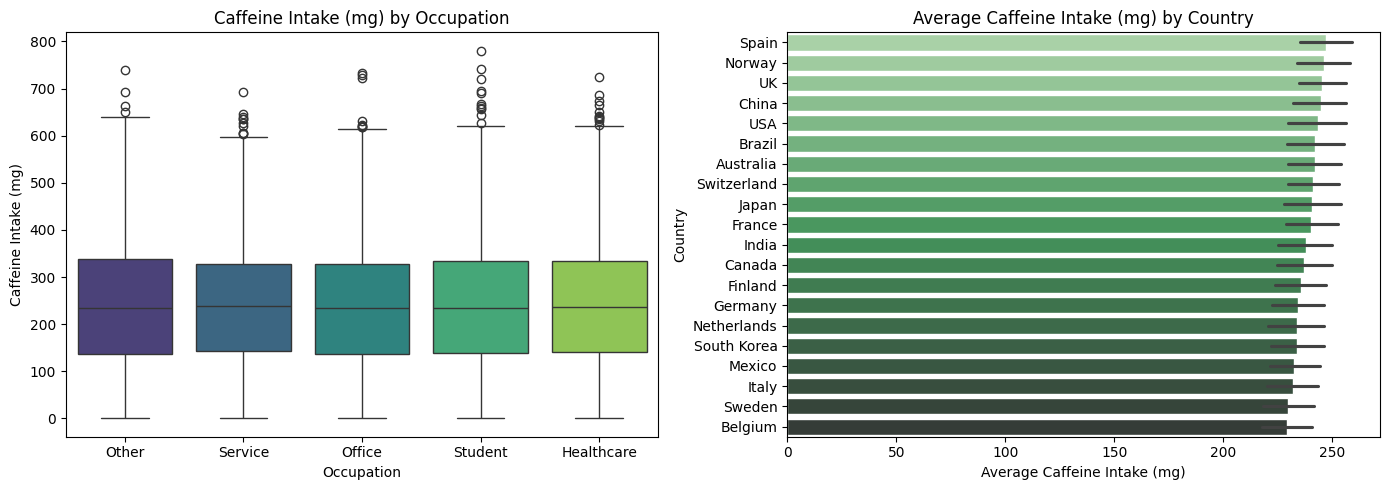

In [147]:
fig, axes = plt.subplots(1,2, figsize=(14,5))

with sns.axes_style("whitegrid"):
  sns.boxplot(data=coffee_mdf, x = "Occupation", y = "Caffeine_mg", hue="Occupation", palette="viridis", legend=False, ax = axes[0])
  axes[0].set_title("Caffeine Intake (mg) by Occupation")
  axes[0].set_xlabel("Occupation")
  axes[0].set_ylabel("Caffeine Intake (mg)")

with sns.axes_style("ticks"):
  country_caffeine_order = coffee_mdf.groupby('Country')['Caffeine_mg'].mean().sort_values(ascending=False).index
  sns.barplot(data=coffee_mdf, x="Caffeine_mg", y="Country", order=country_caffeine_order, palette="Greens_d", ax = axes[1])
  axes[1].set_title("Average Caffeine Intake (mg) by Country")
  axes[1].set_xlabel("Average Caffeine Intake (mg)")
  axes[1].set_ylabel("Country")

plt.tight_layout()
plt.show()

In [148]:
average_caffeine_by_country = coffee_mdf.groupby('Country')['Caffeine_mg'].mean()
highest_caffeine_country = average_caffeine_by_country.idxmax()
lowest_caffeine_country = average_caffeine_by_country.idxmin()
highest_caffeine_value = average_caffeine_by_country.max()
lowest_caffeine_value = average_caffeine_by_country.min()

print(f"Country with the highest average caffeine intake: {highest_caffeine_country} ({highest_caffeine_value:.2f} mg)")
print(f"Country with the lowest average caffeine intake: {lowest_caffeine_country} ({lowest_caffeine_value:.2f} mg)")

Country with the highest average caffeine intake: Spain (247.00 mg)
Country with the lowest average caffeine intake: Belgium (229.08 mg)


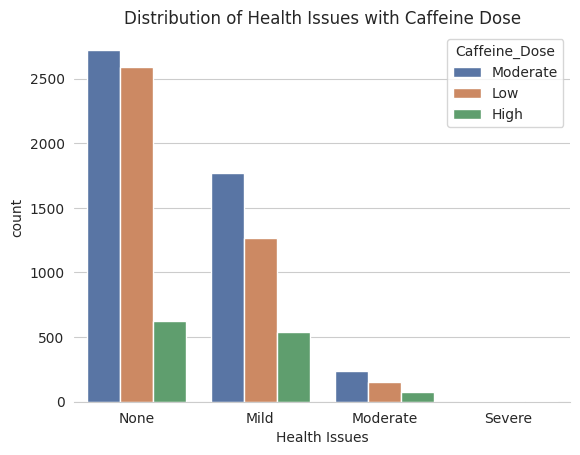

In [149]:
plt.figure()
with sns.axes_style("whitegrid"):
  sns.countplot(data=coffee_mdf, x = "Health_Issues", hue = "Caffeine_Dose",)
  sns.despine(left=True)
  plt.xlabel("Health Issues")
  plt.title("Distribution of Health Issues with Caffeine Dose")
plt.show()

In [150]:
# coffee_mdf.count_values(column["Health_Issues"] == "Severe")
severe_health_count = coffee_mdf['Health_Issues'].value_counts()['Severe']
print(f"Number of entries with Severe Health Issues: {severe_health_count}")

Number of entries with Severe Health Issues: 17


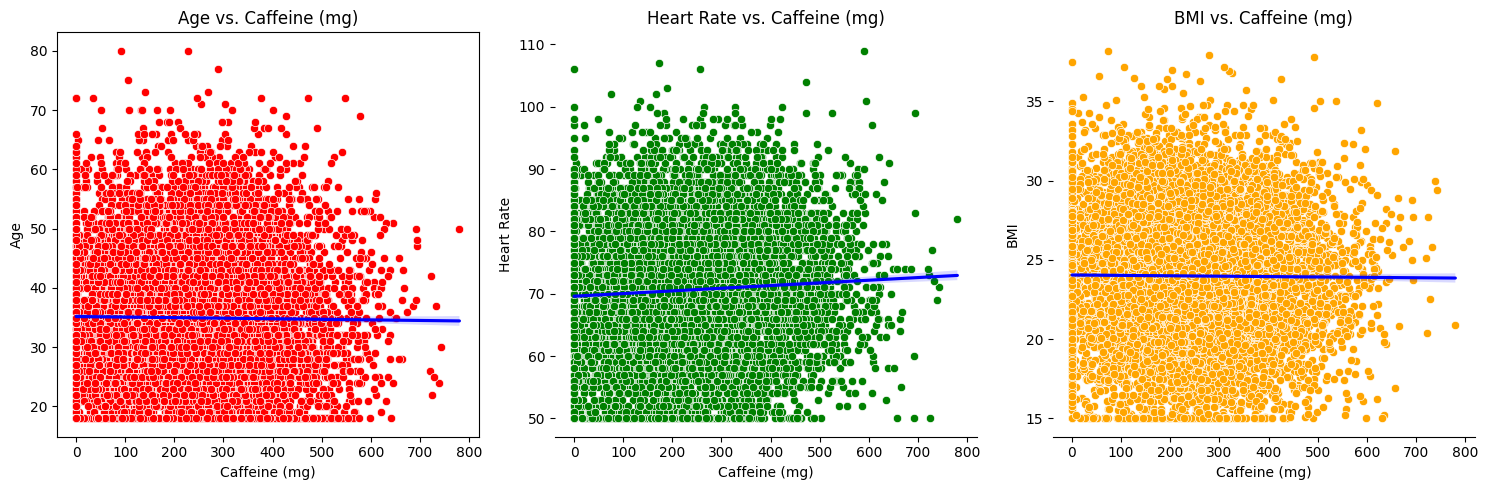

In [151]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
with sns.axes_style("whitegrid"):

  sns.scatterplot(data=coffee_mdf, x = "Caffeine_mg", y = "Age", color='red', ax=axes[0])
  sns.regplot(data=coffee_mdf, x = "Caffeine_mg", y = "Age", scatter=False, color='blue', ax=axes[0])
  sns.despine(left=True, ax=axes[1])
  axes[0].set_xlabel("Caffeine (mg)")
  axes[0].set_ylabel("Age")
  axes[0].set_title("Age vs. Caffeine (mg)")

  sns.scatterplot(data=coffee_mdf, x = "Caffeine_mg", y = "Heart_Rate", color='green', ax=axes[1])
  sns.regplot(data=coffee_mdf, x = "Caffeine_mg", y = "Heart_Rate", scatter=False, color='blue', ax=axes[1])
  sns.despine(left=True, ax=axes[1])
  axes[1].set_xlabel("Caffeine (mg)")
  axes[1].set_ylabel("Heart Rate")
  axes[1].set_title("Heart Rate vs. Caffeine (mg)")

  sns.scatterplot(data=coffee_mdf, x = "Caffeine_mg", y = "BMI", color='orange', ax=axes[2])
  sns.regplot(data=coffee_mdf, x = "Caffeine_mg", y = "BMI", scatter=False, color='blue', ax=axes[2])
  sns.despine(left=True, ax=axes[2])
  axes[2].set_xlabel("Caffeine (mg)")
  axes[2].set_ylabel("BMI")
  axes[2].set_title("BMI vs. Caffeine (mg)")



plt.tight_layout()
plt.show()

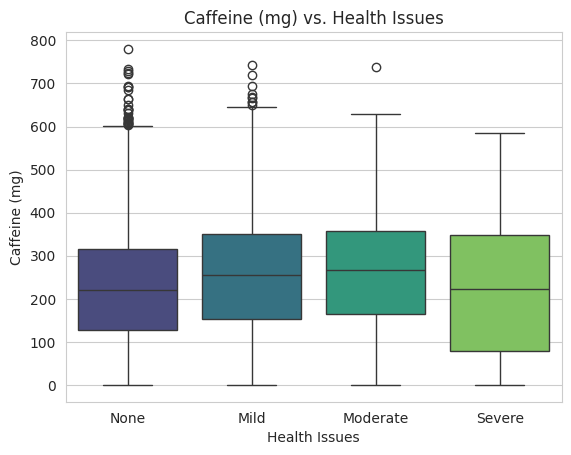

In [152]:
plt.figure()
with sns.axes_style("whitegrid"):
  sns.boxplot(data=coffee_mdf, x = "Health_Issues", y = "Caffeine_mg", hue="Health_Issues", palette="viridis", legend=False)
  plt.xlabel("Health Issues")
  plt.ylabel("Caffeine (mg)")
  plt.title("Caffeine (mg) vs. Health Issues")
plt.show()

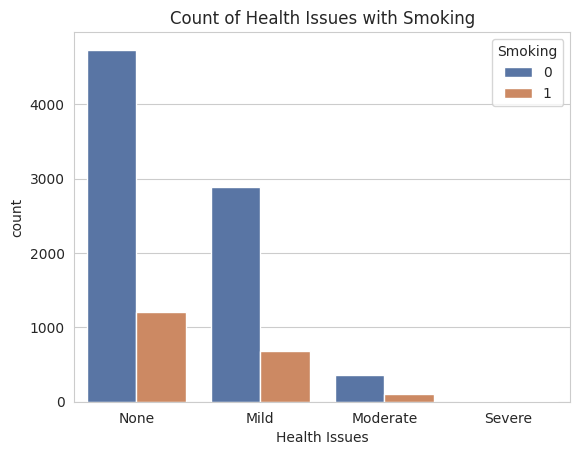

In [153]:
plt.figure()
with sns.axes_style("whitegrid"):
  sns.countplot(data=coffee_mdf, x = "Health_Issues", hue = "Smoking")
  plt.xlabel("Health Issues")
  plt.title("Count of Health Issues with Smoking")
plt.show()

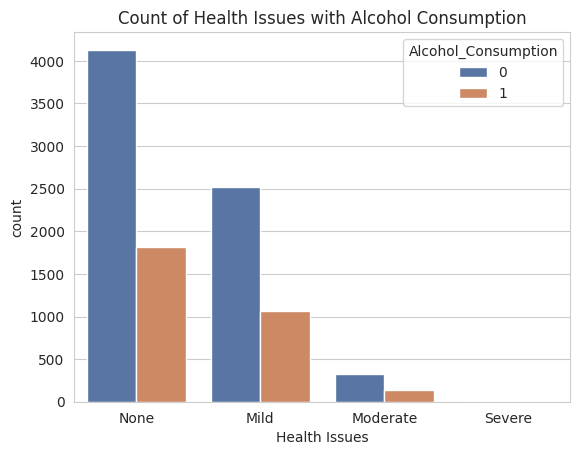

In [154]:
plt.figure()
with sns.axes_style("whitegrid"):
  sns.countplot(data=coffee_mdf, x = "Health_Issues", hue = "Alcohol_Consumption",)
  plt.xlabel("Health Issues")
  plt.title("Count of Health Issues with Alcohol Consumption")
plt.show()

## Features Health Issues are Based On

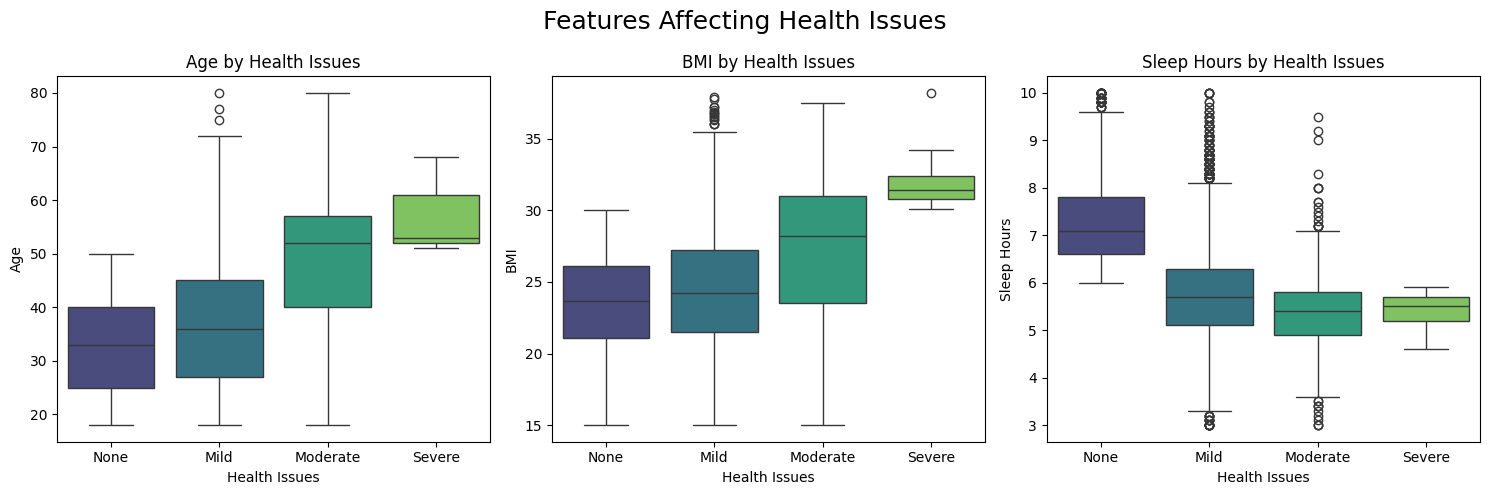

In [155]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
with sns.axes_style("whitegrid"):
  sns.boxplot(data=coffee_mdf, y = "Age", x = "Health_Issues", hue="Health_Issues", palette="viridis", legend=False, ax = axes[0])
  axes[0].set_xlabel("Health Issues")
  axes[0].set_title("Age by Health Issues")

  sns.boxplot(data=coffee_mdf, y = "BMI", x = "Health_Issues", hue="Health_Issues", palette="viridis", legend=False, ax = axes[1])
  axes[1].set_xlabel("Health Issues")
  axes[1].set_title("BMI by Health Issues")


  sns.boxplot(data=coffee_mdf, y = "Sleep_Hours", x = "Health_Issues", hue="Health_Issues", palette="viridis", legend=False, ax = axes[2])
  axes[2].set_xlabel("Health Issues")
  axes[2].set_ylabel("Sleep Hours")
  axes[2].set_title("Sleep Hours by Health Issues")

plt.suptitle("Features Affecting Health Issues", y=0.98, fontsize=18)
plt.tight_layout()
plt.show()

## Prepare Data for Sleep Quality Prediction (Including Data Leakage)

### Subtask:
Prepare the data for predicting `Sleep_Quality` by redefining the target variable and features, specifically *including* all features to observe the effect of data leakage. Then, apply preprocessing and split the data into training and testing sets.

In [156]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# define Sleep_Quality as the target variable
y_sleep_leakage = coffee_mdf['Sleep_Quality']

# create the feature matrix X_sleep_leakage by dropping Sleep_Quality
X_sleep_leakage = coffee_mdf.drop(columns=['Sleep_Quality'])

# identify numerical features in X_sleep_leakage
numerical_features_sleep_leakage = X_sleep_leakage.select_dtypes(include=np.number).columns.tolist()

# identify categorical features in X_sleep_leakage
categorical_features_sleep_leakage = X_sleep_leakage.select_dtypes(include='object').columns.tolist()

print(f"Numerical features for sleep leakage prediction: {numerical_features_sleep_leakage}")
print(f"Categorical features for sleep leakage prediction: {categorical_features_sleep_leakage}")

# create a ColumnTransformer named preprocessor_sleep_leakage
preprocessor_sleep_leakage = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features_sleep_leakage),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_sleep_leakage)
    ])

# split the data into training and testing sets
X_train_sleep_leakage, X_test_sleep_leakage, y_train_sleep_leakage, y_test_sleep_leakage = train_test_split(
    X_sleep_leakage,
    y_sleep_leakage,
    test_size=0.2,
    random_state=42,
    stratify=y_sleep_leakage
)

# apply the preprocessor_sleep_leakage to transform X_train_sleep_leakage and X_test_sleep_leakage
X_train_sleep_leakage_processed = preprocessor_sleep_leakage.fit_transform(X_train_sleep_leakage)
X_test_sleep_leakage_processed = preprocessor_sleep_leakage.transform(X_test_sleep_leakage)

Numerical features for sleep leakage prediction: ['ID', 'Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours', 'Smoking', 'Alcohol_Consumption']
Categorical features for sleep leakage prediction: ['Gender', 'Country', 'Stress_Level', 'Health_Issues', 'Occupation', 'Caffeine_Dose']


## Train and Evaluate Sleep Quality Prediction Model (Including Data Leakage)

### Subtask:
Train a `RandomForestClassifier` model for `Sleep_Quality` using the data with leakage and evaluate its performance.

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# instantiate the RandomForestClassifier model with class_weight='balanced'
rf_classifier_sleep_leakage = RandomForestClassifier(random_state=42, class_weight='balanced')

# fit the model to the training data
rf_classifier_sleep_leakage.fit(X_train_sleep_leakage_processed, y_train_sleep_leakage)


# make predictions on the preprocessed test features
y_pred_sleep_leakage = rf_classifier_sleep_leakage.predict(X_test_sleep_leakage_processed)

# calculate the accuracy score
rf_accuracy_sleep_leakage = accuracy_score(y_test_sleep_leakage, y_pred_sleep_leakage)

# generate a classification report
rf_report_sleep_leakage = classification_report(y_test_sleep_leakage, y_pred_sleep_leakage)

# generate a confusion matrix
rf_cm_sleep_leakage = confusion_matrix(y_test_sleep_leakage, y_pred_sleep_leakage)

# print the evaluation metrics
print(f"\nAccuracy for Sleep Quality RandomForestClassifier Prediction (with leakage): {rf_accuracy_sleep_leakage:.4f}")
print("\nClassification Report for Sleep Quality RandomForestClassifier Prediction (with leakage):\n", rf_report_sleep_leakage)
print("\nConfusion Matrix for Sleep Quality RandomForestClassifier Prediction (with leakage):\n", rf_cm_sleep_leakage)


Accuracy for Sleep Quality RandomForestClassifier Prediction (with leakage): 0.9865

Classification Report for Sleep Quality RandomForestClassifier Prediction (with leakage):
               precision    recall  f1-score   support

   Excellent       0.93      0.97      0.95       270
        Fair       1.00      1.00      1.00       410
        Good       0.99      0.98      0.99      1128
        Poor       1.00      1.00      1.00       192

    accuracy                           0.99      2000
   macro avg       0.98      0.99      0.98      2000
weighted avg       0.99      0.99      0.99      2000


Confusion Matrix for Sleep Quality RandomForestClassifier Prediction (with leakage):
 [[ 263    0    7    0]
 [   0  410    0    0]
 [  20    0 1108    0]
 [   0    0    0  192]]


### Subtask:
Train a `KNeighborsClassifier` model for `Sleep_Quality` using the data with leakage and evaluate its performance.

In [158]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# edit the preprocessor so that it scales the data for KNN and later LogisticRegression
preprocessor_sleep_leakage_scale = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_sleep_leakage),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_sleep_leakage)
    ])


# split the data into training and testing sets
X_train_sleep_leakage, X_test_sleep_leakage, y_train_sleep_leakage_scale, y_test_sleep_leakage_scale = train_test_split(
    X_sleep_leakage,
    y_sleep_leakage,
    test_size=0.2,
    random_state=42,
    stratify=y_sleep_leakage
)

X_train_sleep_leakage_processed = preprocessor_sleep_leakage_scale.fit_transform(X_train_sleep_leakage)
X_test_sleep_leakage_processed = preprocessor_sleep_leakage_scale.transform(X_test_sleep_leakage)


# instantiate the KNeighborsClassifier model with one neighbor
knn_classifier_sleep_leakage = KNeighborsClassifier(n_neighbors = 1)

# fit the model to the training data
knn_classifier_sleep_leakage.fit(X_train_sleep_leakage_processed, y_train_sleep_leakage)


# make predictions on the preprocessed test features
y_pred_sleep_leakage = knn_classifier_sleep_leakage.predict(X_test_sleep_leakage_processed)

# calculate the accuracy score
knn_accuracy_sleep_leakage = accuracy_score(y_test_sleep_leakage, y_pred_sleep_leakage)

# generate a classification report
knn_report_sleep_leakage = classification_report(y_test_sleep_leakage, y_pred_sleep_leakage)

# generate a confusion matrix
knn_cm_sleep_leakage = confusion_matrix(y_test_sleep_leakage, y_pred_sleep_leakage)

# print the evaluation metrics
print(f"\nAccuracy for Sleep Quality KNeighborsClassifier Prediction (with leakage): {knn_accuracy_sleep_leakage:.4f}")
print("\nClassification Report for Sleep Quality KNeighborsClassifier Prediction (with leakage):\n", knn_report_sleep_leakage)
print("\nConfusion Matrix for Sleep Quality KNeighborsClassifier Prediction (with leakage):\n", knn_cm_sleep_leakage)


Accuracy for Sleep Quality KNeighborsClassifier Prediction (with leakage): 0.8855

Classification Report for Sleep Quality KNeighborsClassifier Prediction (with leakage):
               precision    recall  f1-score   support

   Excellent       0.68      0.53      0.59       270
        Fair       0.94      0.98      0.96       410
        Good       0.89      0.94      0.91      1128
        Poor       0.97      0.88      0.92       192

    accuracy                           0.89      2000
   macro avg       0.87      0.83      0.85      2000
weighted avg       0.88      0.89      0.88      2000


Confusion Matrix for Sleep Quality KNeighborsClassifier Prediction (with leakage):
 [[ 142    0  128    0]
 [   0  403    1    6]
 [  67    4 1057    0]
 [   0   22    1  169]]


In [159]:
from tqdm import tqdm # progress slider for "for" loops
results = []
for k in tqdm(range(1, 51, 1)):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_sleep_leakage_processed, y_train_sleep_leakage)

    # create a dictionary to store the results
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test_sleep_leakage, knn.predict(X_test_sleep_leakage_processed))
    })

# convert results to a pandas dataframe for better visualization
results_df = pd.DataFrame(results)
results_df

100%|██████████| 50/50 [00:09<00:00,  5.01it/s]


,k,accuracy
0,1,0.8855
1,2,0.8710
2,3,0.9050
3,4,0.9065
4,5,0.9115
5,6,0.9120
6,7,0.9070
7,8,0.9140
8,9,0.9115
9,10,0.9170


In [160]:
# Find the max value and associated index
max_val = results_df['accuracy'].max()
max_val_idx = results_df['accuracy'].idxmax()

print("Max value =", max_val, '|', " Best k =", results_df['k'][max_val_idx])

# train and test the model with the best "k"
knn_classifier_sleep_leakage = KNeighborsClassifier(n_neighbors = max_val_idx)

knn_classifier_sleep_leakage.fit(X_train_sleep_leakage_processed, y_train_sleep_leakage)

y_pred_sleep_leakage = knn_classifier_sleep_leakage.predict(X_test_sleep_leakage_processed)

# calculate the accuracy score
knn_accuracy_sleep_leakage = accuracy_score(y_test_sleep_leakage, y_pred_sleep_leakage)

# generate a classification report
knn_report_sleep_leakage = classification_report(y_test_sleep_leakage, y_pred_sleep_leakage)

# generate a confusion matrix
knn_cm_sleep_leakage = confusion_matrix(y_test_sleep_leakage, y_pred_sleep_leakage)

# print the evaluation metrics
print(f"\nAccuracy for Sleep Quality KNeighborsClassifier Prediction (with leakage): {knn_accuracy_sleep_leakage:.4f}")
print("\nClassification Report for Sleep Quality KNeighborsClassifier Prediction (with leakage):\n", knn_report_sleep_leakage)
print("\nConfusion Matrix for Sleep Quality KNeighborsClassifier Prediction (with leakage):\n", knn_cm_sleep_leakage)

Max value = 0.917 |  Best k = 10

Accuracy for Sleep Quality KNeighborsClassifier Prediction (with leakage): 0.9115

Classification Report for Sleep Quality KNeighborsClassifier Prediction (with leakage):
               precision    recall  f1-score   support

   Excellent       0.93      0.46      0.62       270
        Fair       0.95      1.00      0.98       410
        Good       0.88      0.99      0.93      1128
        Poor       1.00      0.89      0.94       192

    accuracy                           0.91      2000
   macro avg       0.94      0.83      0.87      2000
weighted avg       0.91      0.91      0.90      2000


Confusion Matrix for Sleep Quality KNeighborsClassifier Prediction (with leakage):
 [[ 125    0  145    0]
 [   0  410    0    0]
 [  10    0 1118    0]
 [   0   21    1  170]]


### Subtask:
Train a `LogisticRegression` model for `Sleep_Quality` using the data with leakage and evaluate its performance.

In [161]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
lr_sleep_leakage = LogisticRegression(penalty=None, solver='lbfgs')

lr_sleep_leakage.fit(X_train_sleep_leakage_processed, y_train_sleep_leakage)

y_pred_sleep_leakage = lr_sleep_leakage.predict(X_test_sleep_leakage_processed)

# calculate the accuracy score
lr_accuracy_sleep_leakage = accuracy_score(y_test_sleep_leakage, y_pred_sleep_leakage)

# generate a classification report
lr_report_sleep_leakage = classification_report(y_test_sleep_leakage, y_pred_sleep_leakage)

# generate a confusion matrix
lr_cm_sleep_leakage = confusion_matrix(y_test_sleep_leakage, y_pred_sleep_leakage)

# print the evaluation metrics
print(f"\nAccuracy for Sleep Quality LogisticRegression Prediction (with leakage): {lr_accuracy_sleep_leakage:.4f}")
print("\nClassification Report for Sleep Quality LogisticRegression Prediction (with leakage):\n", lr_report_sleep_leakage)
print("\nConfusion Matrix for Sleep Quality LogisticRegression Prediction (with leakage):\n", lr_cm_sleep_leakage)


Accuracy for Sleep Quality LogisticRegression Prediction (with leakage): 0.9890

Classification Report for Sleep Quality LogisticRegression Prediction (with leakage):
               precision    recall  f1-score   support

   Excellent       0.96      0.96      0.96       270
        Fair       1.00      1.00      1.00       410
        Good       0.99      0.99      0.99      1128
        Poor       1.00      1.00      1.00       192

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000


Confusion Matrix for Sleep Quality LogisticRegression Prediction (with leakage):
 [[ 258    0   12    0]
 [   0  410    0    0]
 [  10    0 1118    0]
 [   0    0    0  192]]


## Sleep (Leakage) Model Report

### Baseline Sleep Accuracy

In [162]:
# Find the most frequent class in the training target variable
most_frequent_sleep_quality = y_train_sleep_leakage.mode()[0]

# Create a dummy prediction array where every prediction is the most frequent class
y_pred_baseline_sleep = [most_frequent_sleep_quality] * len(y_test_sleep_leakage)

# Calculate the baseline accuracy
baseline_accuracy_sleep = accuracy_score(y_test_sleep_leakage, y_pred_baseline_sleep)

print(f"Most frequent sleep quality in training data: {most_frequent_sleep_quality}")
print(f"Baseline Accuracy for sleep quality (predicting most frequent class): {baseline_accuracy_sleep:.4f}")

Most frequent sleep quality in training data: Good
Baseline Accuracy for sleep quality (predicting most frequent class): 0.5640


### Accuracy Comparison

/tmp/ipython-input-715035846.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=sleep_leakage_df_acc, palette='Blues_d')


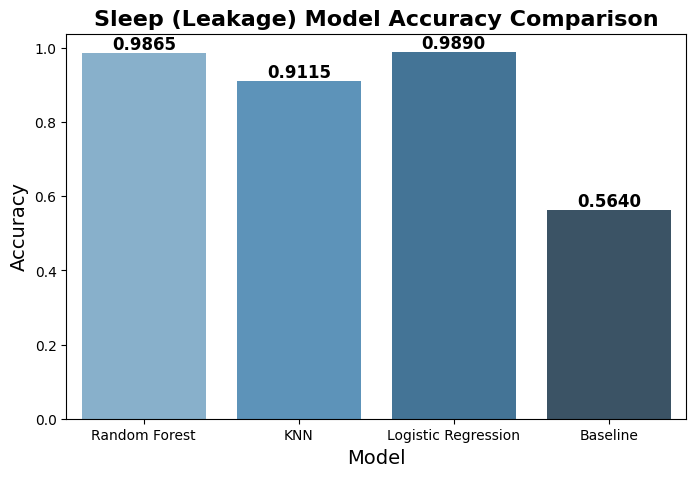

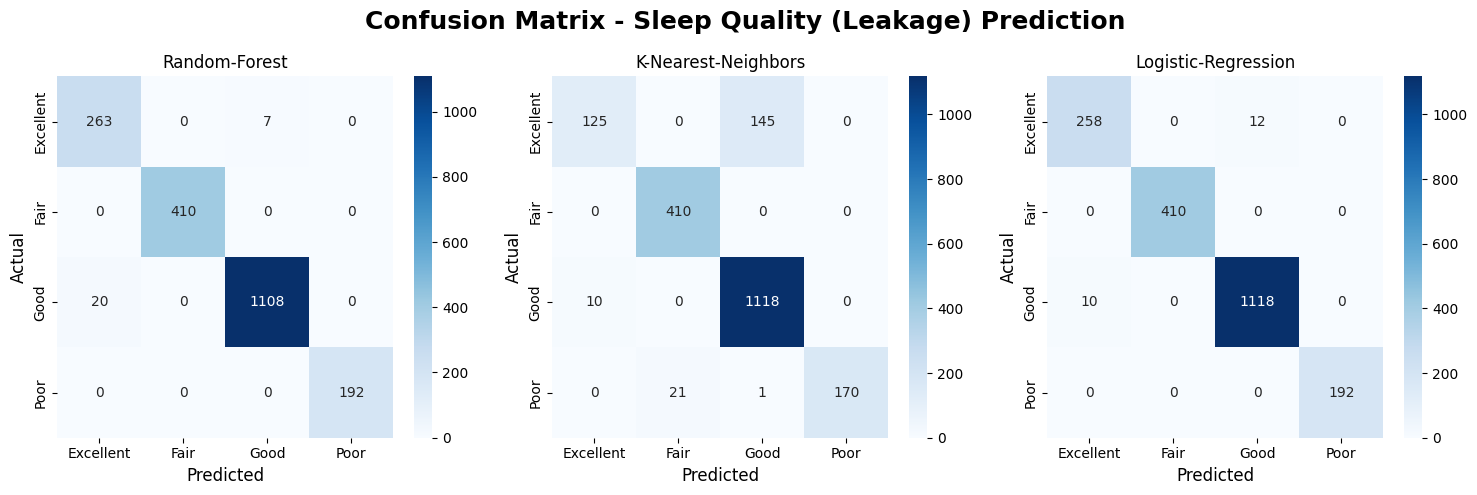


Best Sleep Quality (Leakage) Accuracy: Logistic Regression - 0.9890


In [163]:
# create table of different model accuracies
sleep_leakage_model_accuracies = {
    'Random Forest': rf_accuracy_sleep_leakage,
    'KNN': knn_accuracy_sleep_leakage,
    'Logistic Regression': lr_accuracy_sleep_leakage,
    'Baseline': baseline_accuracy_sleep
}


# extract names and values
models = list(sleep_leakage_model_accuracies.keys())
accuracies = list(sleep_leakage_model_accuracies.values())

# convert to DataFrame for Seaborn
sleep_leakage_df_acc = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

# barplot of accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=sleep_leakage_df_acc, palette='Blues_d')
plt.title('Sleep (Leakage) Model Accuracy Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Annotate bars
for i, row in sleep_leakage_df_acc.iterrows():
    plt.text(i, row.Accuracy + 0.01, f'{row.Accuracy:.4f}',
             ha='center', fontsize=12, fontweight='bold')

plt.show()


print(" ")

fig, axes = plt.subplots(1,3, figsize=(15,5))

# RandomForest confusion matrix
sns.heatmap(rf_cm_sleep_leakage, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Excellent', 'Fair', 'Good', 'Poor'],
            yticklabels=['Excellent', 'Fair', 'Good', 'Poor'],
            ax=axes[0])
axes[0].set_xlabel('Predicted', fontsize=12)
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_title('Random-Forest')

# KNearestNeighbor confusion matrix
sns.heatmap(knn_cm_sleep_leakage, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Excellent', 'Fair', 'Good', 'Poor'],
            yticklabels=['Excellent', 'Fair', 'Good', 'Poor'],
            ax=axes[1])
axes[1].set_xlabel('Predicted', fontsize=12)
axes[1].set_ylabel('Actual', fontsize=12)
axes[1].set_title('K-Nearest-Neighbors')

# LogisticRegression confusion matrix
sns.heatmap(lr_cm_sleep_leakage, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Excellent', 'Fair', 'Good', 'Poor'],
            yticklabels=['Excellent', 'Fair', 'Good', 'Poor'],
            ax=axes[2])
axes[2].set_xlabel('Predicted', fontsize=12)
axes[2].set_ylabel('Actual', fontsize=12)
axes[2].set_title('Logistic-Regression')

plt.suptitle("Confusion Matrix - Sleep Quality (Leakage) Prediction", y=0.98, fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

best_sleep_leakage_accuracy = sleep_leakage_df_acc['Accuracy'].max()
best_sleep_leakage_accuracy_idx = sleep_leakage_df_acc['Accuracy'].idxmax()

print(f'\nBest Sleep Quality (Leakage) Accuracy: {sleep_leakage_df_acc['Model'][best_sleep_leakage_accuracy_idx]} - {best_sleep_leakage_accuracy:.4f}')


Top 15 Features for Sleep Quality (Leakage) Prediction:


,Feature,Importance
4,num__Sleep_Hours,0.356788
35,cat__Stress_Level_Medium,0.178183
33,cat__Stress_Level_High,0.137191
34,cat__Stress_Level_Low,0.133727
38,cat__Health_Issues_None,0.048562
36,cat__Health_Issues_Mild,0.037094
1,num__Age,0.014298
5,num__BMI,0.013746
3,num__Caffeine_mg,0.011192
0,num__ID,0.009116


/tmp/ipython-input-1824620241.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=sleep_leakage_importance_df.head(10), palette='viridis')


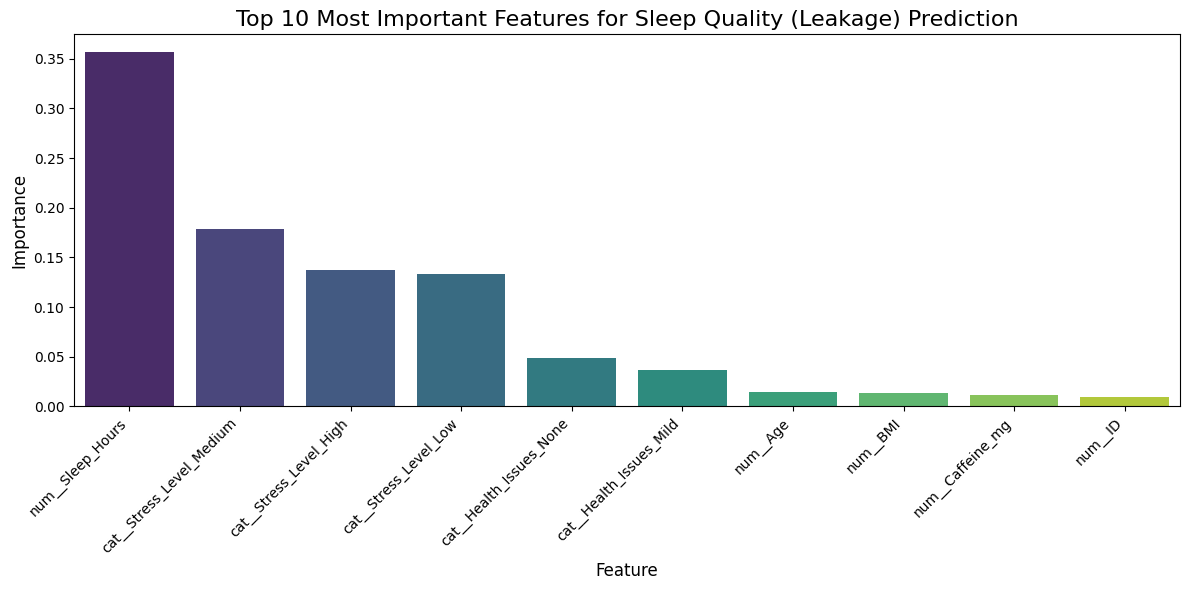

In [164]:
# get feature importances from the trained most accurate model
sleep_leakage_feature_importances = rf_classifier_sleep_leakage.feature_importances_

# get the feature names after preprocessing
sleep_leakage_feature_names = preprocessor_sleep_leakage.get_feature_names_out()

# create a Series for better readability and sorting
sleep_leakage_importance_df = pd.DataFrame({'Feature': sleep_leakage_feature_names, 'Importance': sleep_leakage_feature_importances})

# sort features by importance in descending order
sleep_leakage_importance_df = sleep_leakage_importance_df.sort_values(by='Importance', ascending=False)

# display top 15 features
print("\nTop 15 Features for Sleep Quality (Leakage) Prediction:")
display(sleep_leakage_importance_df.head(15))

# barplot of top 10 features
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Importance', data=sleep_leakage_importance_df.head(10), palette='viridis')
plt.title('Top 10 Most Important Features for Sleep Quality (Leakage) Prediction', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Prepare Data for Stress Level Prediction (Including Data Leakage)

### Subtask:
Prepare the data for predicting `Stress_Level` by redefining the target variable and features, specifically *including* `Sleep_Quality` and `Sleep_Hours` to observe the effect of data leakage. Then, apply preprocessing and split the data into training and testing sets.

In [165]:
# define Stress_Level as the target variable
y_stress_leakage = coffee_mdf['Stress_Level']

# create the feature matrix X_stress_leakage by dropping fewer columns
X_stress_leakage = coffee_mdf.drop(columns=['Stress_Level'])

# identify numerical features in X_stress_leakage
numerical_features_stress_leakage = X_stress_leakage.select_dtypes(include=np.number).columns.tolist()

# identify categorical features in X_stress_leakage
categorical_features_stress_leakage = X_stress_leakage.select_dtypes(include='object').columns.tolist()

print(f"Numerical features for stress leakage prediction: {numerical_features_stress_leakage}")
print(f"Categorical features for stress leakage prediction: {categorical_features_stress_leakage}")

# create a ColumnTransformer named preprocessor_stress_leakage
preprocessor_stress_leakage = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features_stress_leakage),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_stress_leakage)
    ])

# split the data into training and testing sets
X_train_stress_leakage, X_test_stress_leakage, y_train_stress_leakage, y_test_stress_leakage = train_test_split(
    X_stress_leakage,
    y_stress_leakage,
    test_size=0.2,
    random_state=42,
    stratify=y_stress_leakage
)

# apply the preprocessor_stress_leakage to transform X_train_stress_leakage and X_test_stress_leakage
X_train_stress_leakage_processed = preprocessor_stress_leakage.fit_transform(X_train_stress_leakage)
X_test_stress_leakage_processed = preprocessor_stress_leakage.transform(X_test_stress_leakage)

Numerical features for stress leakage prediction: ['ID', 'Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours', 'Smoking', 'Alcohol_Consumption']
Categorical features for stress leakage prediction: ['Gender', 'Country', 'Sleep_Quality', 'Health_Issues', 'Occupation', 'Caffeine_Dose']


## Train and Evaluate Stress Quality Prediction Model (Including Data Leakage)

### Subtask:
Train a `RandomForestClassifier` model for `Stress_Level` using the data with leakage and evaluate its performance.

In [166]:
# RandomForestClassifier
rf_classifier_stress_leakage = RandomForestClassifier(random_state=42, class_weight='balanced')

rf_classifier_stress_leakage.fit(X_train_stress_leakage_processed, y_train_stress_leakage)

y_pred_stress_leakage = rf_classifier_stress_leakage.predict(X_test_stress_leakage_processed)

# calculate the accuracy score
rf_accuracy_stress_leakage = accuracy_score(y_test_stress_leakage, y_pred_stress_leakage)

# generate a classification report
rf_report_stress_leakage = classification_report(y_test_stress_leakage, y_pred_stress_leakage)

# generate a confusion matrix
rf_cm_stress_leakage = confusion_matrix(y_test_stress_leakage, y_pred_stress_leakage)

# print the evaluation metrics
print(f"\nAccuracy for Stress Quality RandomForestClassifier Prediction (with leakage): {rf_accuracy_stress_leakage:.4f}")
print("\nClassification Report for Stress Quality RandomForestClassifier Prediction (with leakage):\n", rf_report_stress_leakage)
print("\nConfusion Matrix for Stress Quality RandomForestClassifier Prediction (with leakage):\n", rf_cm_stress_leakage)


Accuracy for Stress Quality RandomForestClassifier Prediction (with leakage): 1.0000

Classification Report for Stress Quality RandomForestClassifier Prediction (with leakage):
               precision    recall  f1-score   support

        High       1.00      1.00      1.00       192
         Low       1.00      1.00      1.00      1398
      Medium       1.00      1.00      1.00       410

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Confusion Matrix for Stress Quality RandomForestClassifier Prediction (with leakage):
 [[ 192    0    0]
 [   0 1398    0]
 [   0    0  410]]


### Subtask:
Train a `KNeighborsClassifier` model for `Stress_Level` using the data with leakage and evaluate its performance.

In [167]:
# edit the preprocessor so that it scales the data for KNN
preprocessor_stress_leakage_scale = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_stress_leakage),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_stress_leakage)
    ])


# split the data into training and testing sets
X_train_stress_leakage, X_test_stress_leakage, y_train_stress_leakage, y_test_stress_leakage = train_test_split(
    X_stress_leakage,
    y_stress_leakage,
    test_size=0.2,
    random_state=42,
    stratify=y_stress_leakage
)

X_train_stress_leakage_processed = preprocessor_stress_leakage_scale.fit_transform(X_train_stress_leakage)
X_test_stress_leakage_processed = preprocessor_stress_leakage_scale.transform(X_test_stress_leakage)


# KNeighbors Classifier
knn_classifier_stress_leakage = KNeighborsClassifier(n_neighbors = 1)

knn_classifier_stress_leakage.fit(X_train_stress_leakage_processed, y_train_stress_leakage)

y_pred_stress_leakage = knn_classifier_stress_leakage.predict(X_test_stress_leakage_processed)

# calculate the accuracy score
knn_accuracy_stress_leakage = accuracy_score(y_test_stress_leakage, y_pred_stress_leakage)

# generate a classification report
knn_report_stress_leakage = classification_report(y_test_stress_leakage, y_pred_stress_leakage)

# generate a confusion matrix
knn_cm_stress_leakage = confusion_matrix(y_test_stress_leakage, y_pred_stress_leakage)

# print the evaluation metrics
print(f"\nAccuracy for Stress Quality KNeighborsClassifier Prediction (with leakage): {knn_accuracy_stress_leakage:.4f}")
print("\nClassification Report for Stress Quality KNeighborsClassifier Prediction (with leakage):\n", knn_report_stress_leakage)
print("\nConfusion Matrix for Stress Quality KNeighborsClassifier Prediction (with leakage):\n", knn_cm_stress_leakage)


Accuracy for Stress Quality KNeighborsClassifier Prediction (with leakage): 0.9850

Classification Report for Stress Quality KNeighborsClassifier Prediction (with leakage):
               precision    recall  f1-score   support

        High       0.96      0.91      0.94       192
         Low       1.00      1.00      1.00      1398
      Medium       0.95      0.98      0.96       410

    accuracy                           0.98      2000
   macro avg       0.97      0.96      0.97      2000
weighted avg       0.99      0.98      0.98      2000


Confusion Matrix for Stress Quality KNeighborsClassifier Prediction (with leakage):
 [[ 175    0   17]
 [   0 1395    3]
 [   7    3  400]]


In [168]:
results = []
for k in tqdm(range(1, 51, 1)):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_stress_leakage_processed, y_train_stress_leakage)

    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test_stress_leakage, knn.predict(X_test_stress_leakage_processed))
    })

results_df = pd.DataFrame(results)
results_df

100%|██████████| 50/50 [00:10<00:00,  4.93it/s]


,k,accuracy
0,1,0.9850
1,2,0.9835
2,3,0.9880
3,4,0.9910
4,5,0.9935
5,6,0.9960
6,7,0.9945
7,8,0.9950
8,9,0.9945
9,10,0.9955


In [169]:
# Find the max value and associated index
max_val = results_df['accuracy'].max()
max_val_idx = results_df['accuracy'].idxmax()

print("Max value =", max_val, '|', " Best k =", results_df['k'][max_val_idx])

# KNeighbors Classifier with best "k"
knn_classifier_stress_leakage = KNeighborsClassifier(n_neighbors = max_val_idx)

knn_classifier_stress_leakage.fit(X_train_stress_leakage_processed, y_train_stress_leakage)

y_pred_stress_leakage = knn_classifier_stress_leakage.predict(X_test_stress_leakage_processed)

# calculate the accuracy score
knn_accuracy_stress_leakage = accuracy_score(y_test_stress_leakage, y_pred_stress_leakage)

# generate a classification report
knn_report_stress_leakage = classification_report(y_test_stress_leakage, y_pred_stress_leakage)

# generate a confusion matrix
knn_cm_stress_leakage = confusion_matrix(y_test_stress_leakage, y_pred_stress_leakage)

# print the evaluation metrics
print(f"\nAccuracy for Stress Quality KNeighborsClassifier Prediction (with leakage): {knn_accuracy_stress_leakage:.4f}")
print("\nClassification Report for Stress Quality KNeighborsClassifier Prediction (with leakage):\n", knn_report_stress_leakage)
print("\nConfusion Matrix for Stress Quality KNeighborsClassifier Prediction (with leakage):\n", knn_cm_stress_leakage)

Max value = 0.996 |  Best k = 6

Accuracy for Stress Quality KNeighborsClassifier Prediction (with leakage): 0.9935

Classification Report for Stress Quality KNeighborsClassifier Prediction (with leakage):
               precision    recall  f1-score   support

        High       0.99      0.95      0.97       192
         Low       1.00      1.00      1.00      1398
      Medium       0.98      1.00      0.99       410

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       0.99      0.99      0.99      2000


Confusion Matrix for Stress Quality KNeighborsClassifier Prediction (with leakage):
 [[ 182    1    9]
 [   0 1397    1]
 [   1    1  408]]


### Subtask:
Train a `LogisticRegression` model for `Stress_Level` using the data with leakage and evaluate its performance.

In [170]:
# LogisticRegression model
lr_stress_leakage = LogisticRegression(penalty=None, solver='lbfgs')

lr_stress_leakage.fit(X_train_stress_leakage_processed, y_train_stress_leakage)

y_pred_stress_leakage = lr_stress_leakage.predict(X_test_stress_leakage_processed)

# Calculate the accuracy score
lr_accuracy_stress_leakage = accuracy_score(y_test_stress_leakage, y_pred_stress_leakage)

# Generate a classification report
lr_report_stress_leakage = classification_report(y_test_stress_leakage, y_pred_stress_leakage)

# Generate a confusion matrix
lr_cm_stress_leakage = confusion_matrix(y_test_stress_leakage, y_pred_stress_leakage)

# Print the evaluation metrics
print(f"\nAccuracy for Stress Quality Logistic Regression Prediction (with leakage): {lr_accuracy_stress_leakage:.4f}")
print("\nClassification Report for Stress Quality Logistic Regression Prediction (with leakage):\n", lr_report_stress_leakage)
print("\nConfusion Matrix for Stress Quality Logistic Regression Prediction (with leakage):\n", lr_cm_stress_leakage)


Accuracy for Stress Quality Logistic Regression Prediction (with leakage): 1.0000

Classification Report for Stress Quality Logistic Regression Prediction (with leakage):
               precision    recall  f1-score   support

        High       1.00      1.00      1.00       192
         Low       1.00      1.00      1.00      1398
      Medium       1.00      1.00      1.00       410

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Confusion Matrix for Stress Quality Logistic Regression Prediction (with leakage):
 [[ 192    0    0]
 [   0 1398    0]
 [   0    0  410]]


## Stress (Leakage) Model Report

### Baseline Stress Accuracy

In [171]:
# Find the most frequent class in the training target variable
most_frequent_stress_quality = y_train_stress_leakage.mode()[0]

# Create a dummy prediction array where every prediction is the most frequent class
y_pred_baseline_stress = [most_frequent_stress_quality] * len(y_test_stress_leakage)

# Calculate the baseline accuracy
baseline_accuracy_stress = accuracy_score(y_test_stress_leakage, y_pred_baseline_stress)

print(f"Most frequent Stress Level in training data: {most_frequent_stress_quality}")
print(f"Baseline Accuracy for Stress Level (predicting most frequent class): {baseline_accuracy_stress:.4f}")

Most frequent Stress Level in training data: Low
Baseline Accuracy for Stress Level (predicting most frequent class): 0.6990


### Accuracy Comparison

/tmp/ipython-input-2726571317.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=stress_leakage_df_acc, palette='Blues_d')


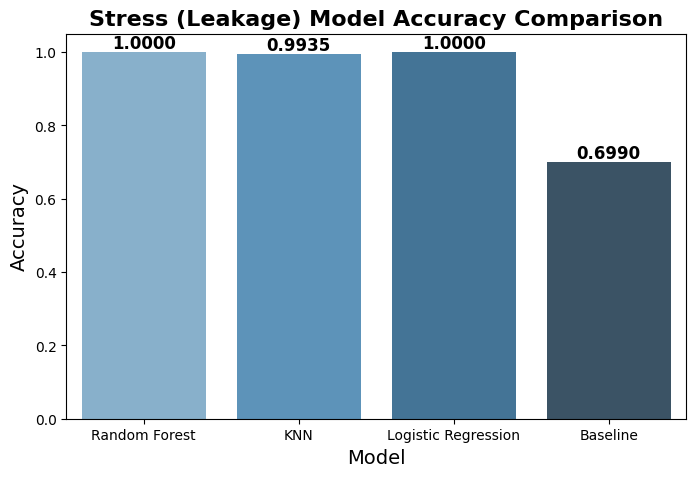

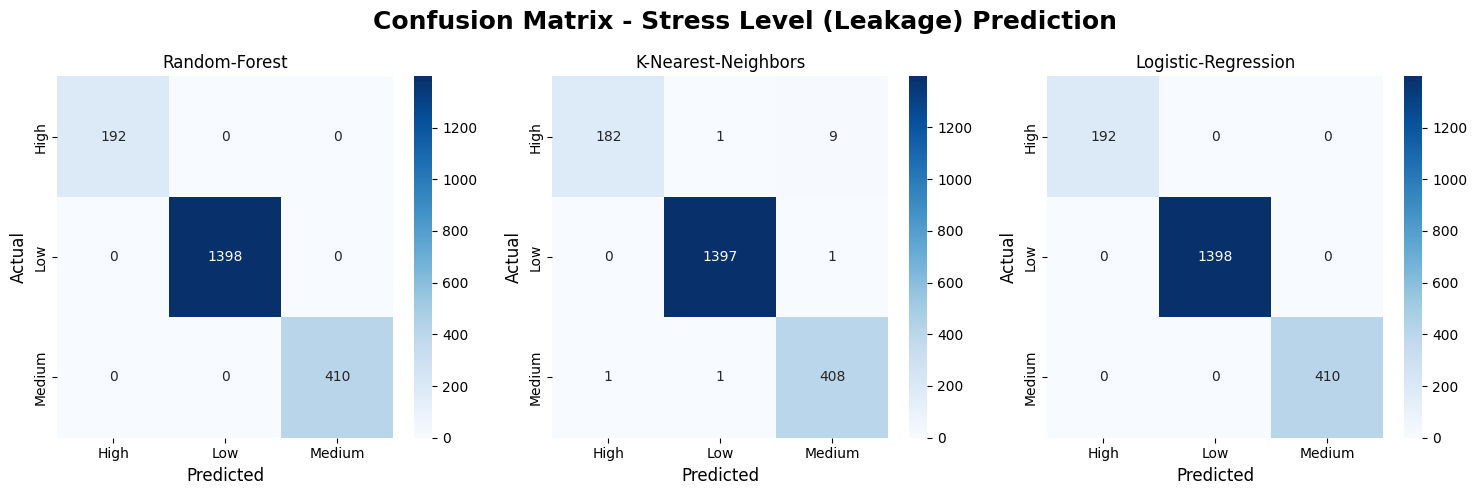


Best Stress Quality (Leakage) Accuracy: Random Forest - 1.0


In [172]:
# table with different stress model accuracies
stress_leakage_model_accuracies = {
    'Random Forest': rf_accuracy_stress_leakage,
    'KNN': knn_accuracy_stress_leakage,
    'Logistic Regression': lr_accuracy_stress_leakage,
    'Baseline': baseline_accuracy_stress,
}


# extract names and values
models = list(stress_leakage_model_accuracies.keys())
accuracies = list(stress_leakage_model_accuracies.values())

# convert to DataFrame for Seaborn
stress_leakage_df_acc = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

# barplot of accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=stress_leakage_df_acc, palette='Blues_d')
plt.title('Stress (Leakage) Model Accuracy Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Annotate bars
for i, row in stress_leakage_df_acc.iterrows():
    plt.text(i, row.Accuracy + 0.01, f'{row.Accuracy:.4f}',
             ha='center', fontsize=12, fontweight='bold')

plt.show()


print(" ")

fig, axes = plt.subplots(1,3, figsize=(15,5))

# RandomForest confusion matrix
sns.heatmap(rf_cm_stress_leakage, annot=True, cmap='Blues', fmt='d',
            xticklabels=['High', 'Low', 'Medium'],
            yticklabels=['High', 'Low', 'Medium'],
            ax=axes[0])
axes[0].set_xlabel('Predicted', fontsize=12)
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_title('Random-Forest')

# KNearestNeighbor confusion matrix
sns.heatmap(knn_cm_stress_leakage, annot=True, cmap='Blues', fmt='d',
            xticklabels=['High', 'Low', 'Medium'],
            yticklabels=['High', 'Low', 'Medium'],
            ax=axes[1])
axes[1].set_xlabel('Predicted', fontsize=12)
axes[1].set_ylabel('Actual', fontsize=12)
axes[1].set_title('K-Nearest-Neighbors')

# LogisticRegression confusion matrix
sns.heatmap(lr_cm_stress_leakage, annot=True, cmap='Blues', fmt='d',
            xticklabels=['High', 'Low', 'Medium'],
            yticklabels=['High', 'Low', 'Medium'],
            ax=axes[2])
axes[2].set_xlabel('Predicted', fontsize=12)
axes[2].set_ylabel('Actual', fontsize=12)
axes[2].set_title('Logistic-Regression')

plt.suptitle("Confusion Matrix - Stress Level (Leakage) Prediction", y=0.98, fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

best_stress_leakage_accuracy = stress_leakage_df_acc['Accuracy'].max()
best_stress_leakage_accuracy_idx = stress_leakage_df_acc['Accuracy'].idxmax()

print(f'\nBest Stress Quality (Leakage) Accuracy: {stress_leakage_df_acc['Model'][best_stress_leakage_accuracy_idx]} - {best_stress_leakage_accuracy}')



Top 15 Features for Stress Level (Leakage) Prediction:


,Feature,Importance
34,cat__Sleep_Quality_Fair,0.255135
36,cat__Sleep_Quality_Poor,0.233255
4,num__Sleep_Hours,0.201306
39,cat__Health_Issues_None,0.107780
35,cat__Sleep_Quality_Good,0.092289
37,cat__Health_Issues_Mild,0.052205
33,cat__Sleep_Quality_Excellent,0.018999
38,cat__Health_Issues_Moderate,0.010471
1,num__Age,0.010141
5,num__BMI,0.005596


/tmp/ipython-input-981420436.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=stress_leakage_importance_df.head(10), palette='viridis')


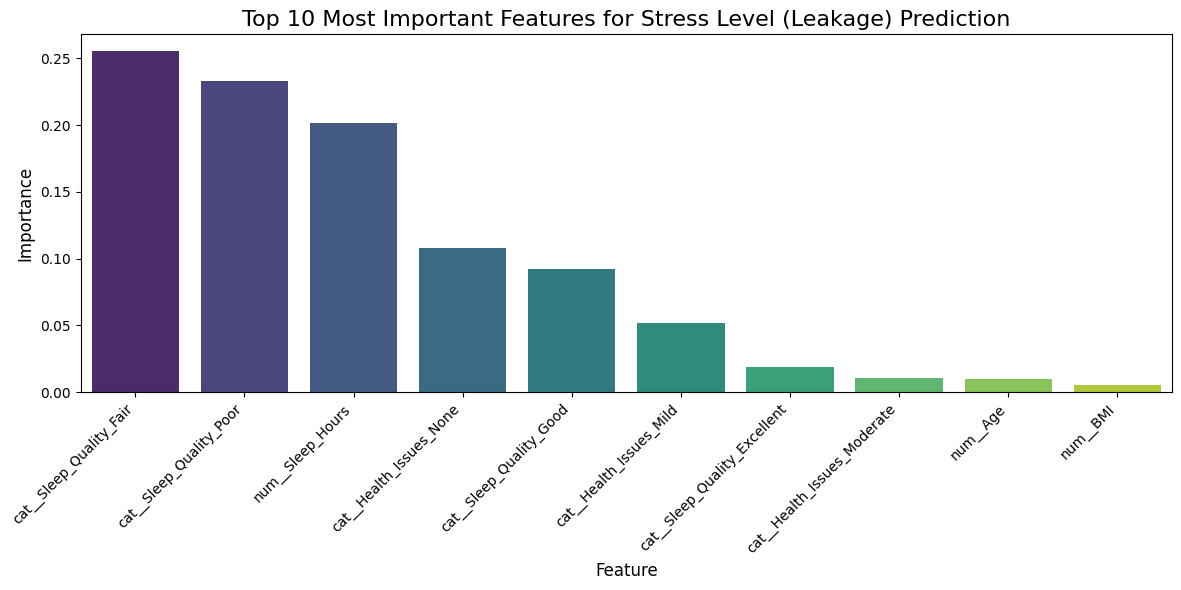

In [173]:
# Get feature importances from the trained most accurate model
stress_leakage_feature_importances = rf_classifier_stress_leakage.feature_importances_

stress_leakage_feature_names = preprocessor_stress_leakage.get_feature_names_out()

stress_leakage_importance_df = pd.DataFrame({'Feature': stress_leakage_feature_names, 'Importance': stress_leakage_feature_importances})

stress_leakage_importance_df = stress_leakage_importance_df.sort_values(by='Importance', ascending=False)

# display the top 15 features
print("\nTop 15 Features for Stress Level (Leakage) Prediction:")
display(stress_leakage_importance_df.head(15))

# barplot of top 10 features
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Importance', data=stress_leakage_importance_df.head(10), palette='viridis')
plt.title('Top 10 Most Important Features for Stress Level (Leakage) Prediction', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Prepare Data for Sleep Quality Prediction (Without Data Leakage)

### Subtask:
Prepare the data for predicting `Sleep_Quality` by redefining the target variable and features, specifically *excluding* features that are based on or related to other features. Then, apply preprocessing and split the data into training and testing sets.

In [174]:
# define Sleep_Quality as the target variable
y_sleep = coffee_mdf['Sleep_Quality']

columns_to_drop_for_sleep_prediction = [
    'ID',
    'Coffee_Intake', # redundant (already have caffeine_mg)
    'Caffeine_Dose', # redundant
    'Sleep_Hours', #directly affects Sleep_Quality
    'Stress_Level', # based on sleep
    'Health_Issues', # based on sleep
    'Sleep_Quality'
]

# dropping related features
X_sleep = coffee_mdf.drop(columns=columns_to_drop_for_sleep_prediction)

# identify numerical features
numerical_features_sleep = X_sleep.select_dtypes(include=np.number).columns.tolist()

# identify categorical features
categorical_features_sleep = X_sleep.select_dtypes(include='object').columns.tolist()

print(f"Numerical features for sleep prediction: {numerical_features_sleep}")
print(f"Categorical features for sleep  prediction: {categorical_features_sleep}")

# create a ColumnTransformer named preprocessor_sleep
preprocessor_sleep = ColumnTransformer(
    transformers=[

        ('num', 'passthrough', numerical_features_sleep),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_sleep)
    ])

# split the data into training and testing sets
X_train_sleep, X_test_sleep, y_train_sleep, y_test_sleep = train_test_split(
    X_sleep,
    y_sleep,
    test_size=0.2,
    random_state=42,
    stratify=y_sleep
)

# apply the preprocessor_sleep to transform X_train_sleep and X_test_sleep
X_train_sleep_processed = preprocessor_sleep.fit_transform(X_train_sleep)
X_test_sleep_processed = preprocessor_sleep.transform(X_test_sleep)

Numerical features for sleep prediction: ['Age', 'Caffeine_mg', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours', 'Smoking', 'Alcohol_Consumption']
Categorical features for sleep  prediction: ['Gender', 'Country', 'Occupation']


## Train and Evaluate Sleep Quality Prediction Model

### Subtask:
Train a `RandomForestClassifier` model for `Sleep_Quality` using the data without leakage and evaluate its performance.

In [175]:
# instantiate the RandomForestClassifier model with class_weight='balanced'
rf_classifier_sleep = RandomForestClassifier(random_state=42, class_weight='balanced')

# fit the model to the training data
rf_classifier_sleep.fit(X_train_sleep_processed, y_train_sleep)


# make predictions on the preprocessed test features
y_pred_sleep = rf_classifier_sleep.predict(X_test_sleep_processed)

# calculate the accuracy score
rf_accuracy_sleep = accuracy_score(y_test_sleep, y_pred_sleep)

# generate a classification report
rf_report_sleep = classification_report(y_test_sleep, y_pred_sleep)

# generate a confusion matrix
rf_cm_sleep = confusion_matrix(y_test_sleep, y_pred_sleep)

# print the evaluation metrics
print(f"\nAccuracy for Sleep Quality RandomForestClassifier Prediction: {rf_accuracy_sleep:.4f}")
print("\nClassification Report for Sleep Quality RandomForestClassifier Prediction:\n", rf_report_sleep)
print("\nConfusion Matrix for Sleep Quality RandomForestClassifier Prediction:\n", rf_cm_sleep)


Accuracy for Sleep Quality RandomForestClassifier Prediction: 0.5665

Classification Report for Sleep Quality RandomForestClassifier Prediction:
               precision    recall  f1-score   support

   Excellent       0.00      0.00      0.00       270
        Fair       0.50      0.03      0.06       410
        Good       0.57      0.99      0.72      1128
        Poor       0.00      0.00      0.00       192

    accuracy                           0.57      2000
   macro avg       0.27      0.26      0.20      2000
weighted avg       0.42      0.57      0.42      2000


Confusion Matrix for Sleep Quality RandomForestClassifier Prediction:
 [[   0    2  268    0]
 [   2   13  395    0]
 [   1    7 1120    0]
 [   0    4  188    0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Subtask:
Train a `KNeighborsClassifier` model for `Sleep_Quality` using the data with leakage and evaluate its performance.

In [176]:
# edit the preprocessor so that it scales the data for KNN and later LogisticRegression
preprocessor_sleep_scale = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_sleep),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_sleep)
    ])


# split the data into training and testing sets
X_train_sleep, X_test_sleep, y_train_sleep_scale, y_test_sleep_scale = train_test_split(
    X_sleep,
    y_sleep,
    test_size=0.2,
    random_state=42,
    stratify=y_sleep
)

X_train_sleep_processed = preprocessor_sleep_scale.fit_transform(X_train_sleep)
X_test_sleep_processed = preprocessor_sleep_scale.transform(X_test_sleep)


# instantiate the KNeighborsClassifier model with one neighbor
knn_classifier_sleep = KNeighborsClassifier(n_neighbors = 1)

# fit the model to the training data
knn_classifier_sleep.fit(X_train_sleep_processed, y_train_sleep)


# make predictions on the preprocessed test features
y_pred_sleep = knn_classifier_sleep.predict(X_test_sleep_processed)

# calculate the accuracy score
knn_accuracy_sleep = accuracy_score(y_test_sleep, y_pred_sleep)

# generate a classification report
knn_report_sleep = classification_report(y_test_sleep, y_pred_sleep)

# generate a confusion matrix
knn_cm_sleep = confusion_matrix(y_test_sleep, y_pred_sleep)

# print the evaluation metrics
print(f"\nAccuracy for Sleep Quality KNeighborsClassifier Prediction: {knn_accuracy_sleep:.4f}")
print("\nClassification Report for Sleep Quality KNeighborsClassifier Prediction:\n", knn_report_sleep)
print("\nConfusion Matrix for Sleep Quality KNeighborsClassifier Prediction:\n", knn_cm_sleep)


Accuracy for Sleep Quality KNeighborsClassifier Prediction: 0.3865

Classification Report for Sleep Quality KNeighborsClassifier Prediction:
               precision    recall  f1-score   support

   Excellent       0.17      0.17      0.17       270
        Fair       0.19      0.19      0.19       410
        Good       0.56      0.56      0.56      1128
        Poor       0.08      0.08      0.08       192

    accuracy                           0.39      2000
   macro avg       0.25      0.25      0.25      2000
weighted avg       0.38      0.39      0.38      2000


Confusion Matrix for Sleep Quality KNeighborsClassifier Prediction:
 [[ 45  50 152  23]
 [ 55  77 242  36]
 [147 241 636 104]
 [ 24  39 114  15]]


In [177]:
results = []
for k in tqdm(range(1, 51, 1)):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_sleep_processed, y_train_sleep)

    # create a dictionary to store the results
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test_sleep, knn.predict(X_test_sleep_processed))
    })

# convert results to a pandas dataframe for better visualization
results_df = pd.DataFrame(results)
results_df

100%|██████████| 50/50 [00:44<00:00,  1.12it/s]


,k,accuracy
0,1,0.3865
1,2,0.3395
2,3,0.3965
3,4,0.4235
4,5,0.4360
5,6,0.4555
6,7,0.4645
7,8,0.4880
8,9,0.5005
9,10,0.5050


In [178]:
# Find the max value and associated index
max_val = results_df['accuracy'].max()
max_val_idx = results_df['accuracy'].idxmax()

print("Max value =", max_val, '|', " Best k =", results_df['k'][max_val_idx])

# train and test the model with the best "k"
knn_classifier_sleep = KNeighborsClassifier(n_neighbors = max_val_idx)

knn_classifier_sleep.fit(X_train_sleep_processed, y_train_sleep)

y_pred_sleep = knn_classifier_sleep.predict(X_test_sleep_processed)

# calculate the accuracy score
knn_accuracy_sleep = accuracy_score(y_test_sleep, y_pred_sleep)

# generate a classification report
knn_report_sleep = classification_report(y_test_sleep, y_pred_sleep)

# generate a confusion matrix
knn_cm_sleep = confusion_matrix(y_test_sleep, y_pred_sleep)

# print the evaluation metrics
print(f"\nAccuracy for Sleep Quality KNeighborsClassifier Prediction: {knn_accuracy_sleep:.4f}")
print("\nClassification Report for Sleep Quality KNeighborsClassifier Prediction:\n", knn_report_sleep)
print("\nConfusion Matrix for Sleep Quality KNeighborsClassifier Prediction:\n", knn_cm_sleep)

Max value = 0.5635 |  Best k = 50

Accuracy for Sleep Quality KNeighborsClassifier Prediction: 0.5625

Classification Report for Sleep Quality KNeighborsClassifier Prediction:
               precision    recall  f1-score   support

   Excellent       0.00      0.00      0.00       270
        Fair       0.33      0.00      0.01       410
        Good       0.56      1.00      0.72      1128
        Poor       0.00      0.00      0.00       192

    accuracy                           0.56      2000
   macro avg       0.22      0.25      0.18      2000
weighted avg       0.39      0.56      0.41      2000


Confusion Matrix for Sleep Quality KNeighborsClassifier Prediction:
 [[   0    1  269    0]
 [   0    2  408    0]
 [   2    3 1123    0]
 [   0    0  192    0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Subtask:
Train a `LogisticRegression` model for `Sleep_Quality` and evaluate its performance.

In [179]:
# Logistic Regression
lr_sleep = LogisticRegression(penalty=None, solver='lbfgs')

lr_sleep.fit(X_train_sleep_processed, y_train_sleep)

y_pred_sleep = lr_sleep.predict(X_test_sleep_processed)

# calculate the accuracy score
lr_accuracy_sleep = accuracy_score(y_test_sleep, y_pred_sleep)

# generate a classification report
lr_report_sleep = classification_report(y_test_sleep, y_pred_sleep)

# generate a confusion matrix
lr_cm_sleep = confusion_matrix(y_test_sleep, y_pred_sleep)

# print the evaluation metrics
print(f"\nAccuracy for Sleep Quality LogisticRegression Prediction (with leakage): {lr_accuracy_sleep:.4f}")
print("\nClassification Report for Sleep Quality LogisticRegression Prediction (with leakage):\n", lr_report_sleep)
print("\nConfusion Matrix for Sleep Quality LogisticRegression Prediction (with leakage):\n", lr_cm_sleep)


Accuracy for Sleep Quality LogisticRegression Prediction (with leakage): 0.5640

Classification Report for Sleep Quality LogisticRegression Prediction (with leakage):
               precision    recall  f1-score   support

   Excellent       0.00      0.00      0.00       270
        Fair       0.00      0.00      0.00       410
        Good       0.56      1.00      0.72      1128
        Poor       0.00      0.00      0.00       192

    accuracy                           0.56      2000
   macro avg       0.14      0.25      0.18      2000
weighted avg       0.32      0.56      0.41      2000


Confusion Matrix for Sleep Quality LogisticRegression Prediction (with leakage):
 [[   0    0  270    0]
 [   0    0  410    0]
 [   0    0 1128    0]
 [   0    1  191    0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Sleep Model Report

/tmp/ipython-input-809785077.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=sleep_df_acc, palette='Blues_d')


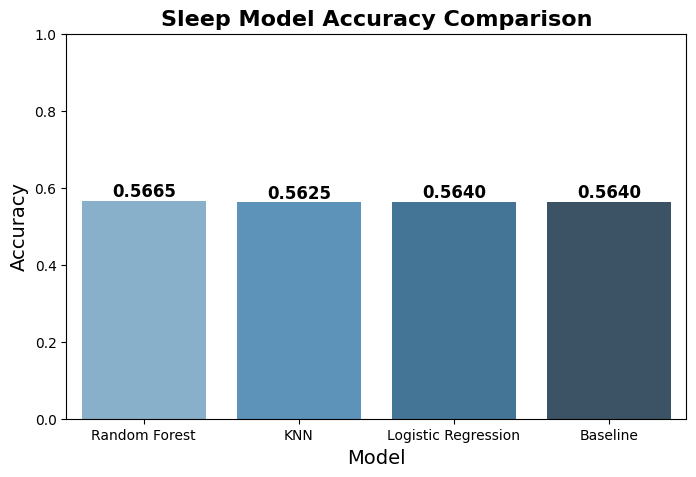

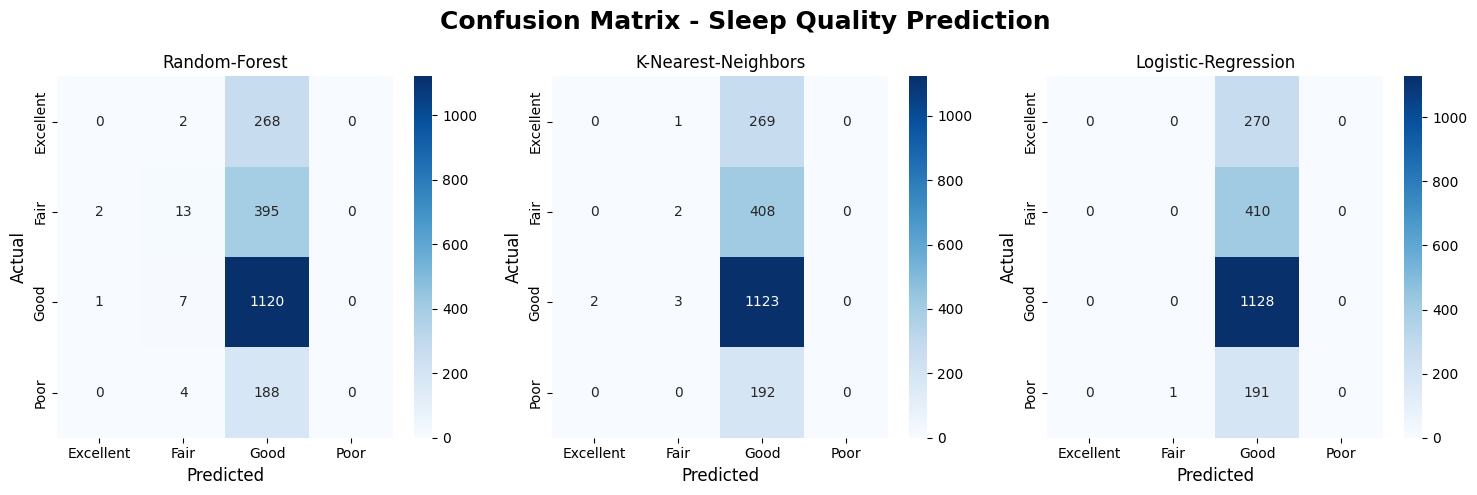


Best Sleep Quality (Leakage) Accuracy: Random Forest - 0.5665


In [181]:
# create table of different model accuracies
sleep_model_accuracies = {
    'Random Forest': rf_accuracy_sleep,
    'KNN': knn_accuracy_sleep,
    'Logistic Regression': lr_accuracy_sleep,
    'Baseline': baseline_accuracy_sleep
}


# extract names and values
models = list(sleep_model_accuracies.keys())
accuracies = list(sleep_model_accuracies.values())

# convert to DataFrame for Seaborn
sleep_df_acc = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

# barplot of accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=sleep_df_acc, palette='Blues_d')
plt.title('Sleep Model Accuracy Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)

# Annotate bars
for i, row in sleep_df_acc.iterrows():
    plt.text(i, row.Accuracy + 0.01, f'{row.Accuracy:.4f}',
             ha='center', fontsize=12, fontweight='bold')

plt.show()


print(" ")

fig, axes = plt.subplots(1,3, figsize=(15,5))

# RandomForest confusion matrix
sns.heatmap(rf_cm_sleep, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Excellent', 'Fair', 'Good', 'Poor'],
            yticklabels=['Excellent', 'Fair', 'Good', 'Poor'],
            ax=axes[0])
axes[0].set_xlabel('Predicted', fontsize=12)
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_title('Random-Forest')

# KNearestNeighbor confusion matrix
sns.heatmap(knn_cm_sleep, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Excellent', 'Fair', 'Good', 'Poor'],
            yticklabels=['Excellent', 'Fair', 'Good', 'Poor'],
            ax=axes[1])
axes[1].set_xlabel('Predicted', fontsize=12)
axes[1].set_ylabel('Actual', fontsize=12)
axes[1].set_title('K-Nearest-Neighbors')

# LogisticRegression confusion matrix
sns.heatmap(lr_cm_sleep, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Excellent', 'Fair', 'Good', 'Poor'],
            yticklabels=['Excellent', 'Fair', 'Good', 'Poor'],
            ax=axes[2])
axes[2].set_xlabel('Predicted', fontsize=12)
axes[2].set_ylabel('Actual', fontsize=12)
axes[2].set_title('Logistic-Regression')


plt.suptitle("Confusion Matrix - Sleep Quality Prediction", y=0.98, fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

best_sleep_accuracy = sleep_df_acc['Accuracy'].max()
best_sleep_accuracy_idx = sleep_df_acc['Accuracy'].idxmax()

print(f'\nBest Sleep Quality (Leakage) Accuracy: {sleep_df_acc['Model'][best_sleep_accuracy_idx]} - {best_sleep_accuracy:.4f}')


Top 10 Features for Sleep Quality Prediction:


,Feature,Importance
1,num__Caffeine_mg,0.151455
2,num__BMI,0.132983
4,num__Physical_Activity_Hours,0.131999
3,num__Heart_Rate,0.119405
0,num__Age,0.117376
6,num__Alcohol_Consumption,0.023583
5,num__Smoking,0.020468
8,cat__Gender_Male,0.018935
7,cat__Gender_Female,0.018073
32,cat__Occupation_Other,0.017306


/tmp/ipython-input-1934260345.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=sleep_importance_df.head(10), palette='viridis')


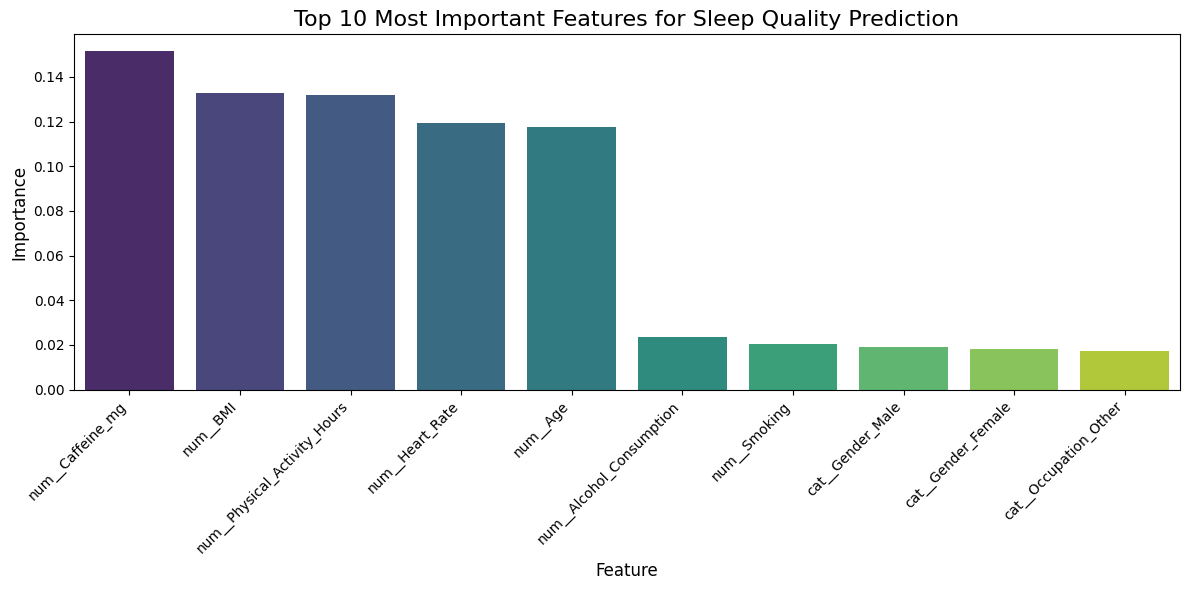

In [182]:
# get feature importances from the trained most accurate model
sleep_feature_importances = rf_classifier_sleep.feature_importances_

# get the feature names after preprocessing
sleep_feature_names = preprocessor_sleep.get_feature_names_out()

# create a Series for better readability and sorting
sleep_importance_df = pd.DataFrame({'Feature': sleep_feature_names, 'Importance': sleep_feature_importances})

# sort features by importance in descending order
sleep_importance_df = sleep_importance_df.sort_values(by='Importance', ascending=False)

# display top 15 features
print("\nTop 10 Features for Sleep Quality Prediction:")
display(sleep_importance_df.head(10))

# barplot of top 10 features
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Importance', data=sleep_importance_df.head(10), palette='viridis')
plt.title('Top 10 Most Important Features for Sleep Quality Prediction', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Prepare Data for Stress Level Prediction (Without Data Leakage)

### Subtask:
Prepare the data for predicting `Stress_Level` by redefining the target variable and features, specifically *excluding* features that are based on or related to Stress_level and other features. Then, apply preprocessing and split the data into training and testing sets.

In [183]:
# define Stress_Level as the target variable
y_stress = coffee_mdf['Stress_Level']

columns_to_drop_for_stress_prediction = [
    'ID', #irrelevant
    'Coffee_Intake', # redundant
    'Caffeine_Dose', # redundant
    'Sleep_Quality', # Derived from Sleep_Hours
    'Sleep_Hours', # Stress_Level is derived from Sleep_Hours, excluding to prevent data
    'Health_Issues', # Health Issues is derved in part by Sleep_Hours
    'Stress_Level' # target
]

# create the feature matrix X_stress
X_stress = coffee_mdf.drop(columns=columns_to_drop_for_stress_prediction)

# identify numerical features in X_stress
numerical_features_stress = X_stress.select_dtypes(include=np.number).columns.tolist()

# identify categorical features in X_stress
categorical_features_stress = X_stress.select_dtypes(include='object').columns.tolist()

print(f"Numerical features for stress prediction: {numerical_features_stress}")
print(f"Categorical features for stress prediction: {categorical_features_stress}")

# create a ColumnTransformer named preprocessor_stress
preprocessor_stress = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features_stress),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_stress)
    ])

# split the data into training and testing sets
X_train_stress, X_test_stress, y_train_stress, y_test_stress = train_test_split(
    X_stress,
    y_stress,
    test_size=0.2,
    random_state=42,
    stratify=y_stress
)

# apply the preprocessor_stress to transform X_train_stress and X_test_stress
X_train_stress_processed = preprocessor_stress.fit_transform(X_train_stress)
X_test_stress_processed = preprocessor_stress.transform(X_test_stress)

Numerical features for stress prediction: ['Age', 'Caffeine_mg', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours', 'Smoking', 'Alcohol_Consumption']
Categorical features for stress prediction: ['Gender', 'Country', 'Occupation']


## Train and Evaluate Stress Quality Prediction Model

### Subtask:
Train a `RandomForestClassifier` model for `Stress_Level` and evaluate its performance.

In [184]:
# RandomForestClassifier
rf_classifier_stress = RandomForestClassifier(random_state=42, class_weight='balanced')

rf_classifier_stress.fit(X_train_stress_processed, y_train_stress)

y_pred_stress = rf_classifier_stress.predict(X_test_stress_processed)

# calculate the accuracy score
rf_accuracy_stress = accuracy_score(y_test_stress, y_pred_stress)

# generate a classification report
rf_report_stress = classification_report(y_test_stress, y_pred_stress)

# generate a confusion matrix
rf_cm_stress = confusion_matrix(y_test_stress, y_pred_stress)

# print the evaluation metrics
print(f"\nAccuracy for Stress Quality RandomForestClassifier Prediction : {rf_accuracy_stress:.4f}")
print("\nClassification Report for Stress Quality RandomForestClassifier Prediction :\n", rf_report_stress)
print("\nConfusion Matrix for Stress Quality RandomForestClassifier Prediction :\n", rf_cm_stress)


Accuracy for Stress Quality RandomForestClassifier Prediction : 0.6965

Classification Report for Stress Quality RandomForestClassifier Prediction :
               precision    recall  f1-score   support

        High       0.00      0.00      0.00       192
         Low       0.70      1.00      0.82      1398
      Medium       0.14      0.00      0.00       410

    accuracy                           0.70      2000
   macro avg       0.28      0.33      0.28      2000
weighted avg       0.52      0.70      0.57      2000


Confusion Matrix for Stress Quality RandomForestClassifier Prediction :
 [[   0  192    0]
 [   0 1392    6]
 [   0  409    1]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Subtask:
Train a `KNeighborsClassifier` model for `Stress_Level` evaluate its performance.

In [185]:
# edit the preprocessor so that it scales the data for KNN
preprocessor_stress_scale = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_stress),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_stress)
    ])


# split the data into training and testing sets
X_train_stress, X_test_stress, y_train_stress, y_test_stress = train_test_split(
    X_stress,
    y_stress,
    test_size=0.2,
    random_state=42,
    stratify=y_stress
)

X_train_stress_processed = preprocessor_stress_scale.fit_transform(X_train_stress)
X_test_stress_processed = preprocessor_stress_scale.transform(X_test_stress)


# KNeighbors Classifier
knn_classifier_stress = KNeighborsClassifier(n_neighbors = 1)

knn_classifier_stress.fit(X_train_stress_processed, y_train_stress)

y_pred_stress = knn_classifier_stress.predict(X_test_stress_processed)

# calculate the accuracy score
knn_accuracy_stress = accuracy_score(y_test_stress, y_pred_stress)

# generate a classification report
knn_report_stress = classification_report(y_test_stress, y_pred_stress)

# generate a confusion matrix
knn_cm_stress = confusion_matrix(y_test_stress, y_pred_stress)

# print the evaluation metrics
print(f"\nAccuracy for Stress Quality KNeighborsClassifier Prediction: {knn_accuracy_stress:.4f}")
print("\nClassification Report for Stress Quality KNeighborsClassifier Prediction:\n", knn_report_stress)
print("\nConfusion Matrix for Stress Quality KNeighborsClassifier Prediction:\n", knn_cm_stress)


Accuracy for Stress Quality KNeighborsClassifier Prediction: 0.5575

Classification Report for Stress Quality KNeighborsClassifier Prediction:
               precision    recall  f1-score   support

        High       0.12      0.11      0.12       192
         Low       0.70      0.72      0.71      1398
      Medium       0.21      0.20      0.20       410

    accuracy                           0.56      2000
   macro avg       0.34      0.34      0.34      2000
weighted avg       0.55      0.56      0.55      2000


Confusion Matrix for Stress Quality KNeighborsClassifier Prediction:
 [[  21  133   38]
 [ 119 1013  266]
 [  30  299   81]]


In [186]:
# find best "k"
results = []
for k in tqdm(range(1, 51, 1)):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_stress_processed, y_train_stress)

    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test_stress, knn.predict(X_test_stress_processed))
    })

results_df = pd.DataFrame(results)
results_df

100%|██████████| 50/50 [00:43<00:00,  1.14it/s]


,k,accuracy
0,1,0.5575
1,2,0.5730
2,3,0.5845
3,4,0.6440
4,5,0.6425
5,6,0.6625
6,7,0.6710
7,8,0.6705
8,9,0.6765
9,10,0.6820


In [187]:
# Find the max value and associated index
max_val = results_df['accuracy'].max()
max_val_idx = results_df['accuracy'].idxmax()

print("Max value =", max_val, '|', " Best k =", results_df['k'][max_val_idx])

# KNeighbors Classifier with best "k"
knn_classifier_stress = KNeighborsClassifier(n_neighbors = max_val_idx)

knn_classifier_stress.fit(X_train_stress_processed, y_train_stress)

y_pred_stress = knn_classifier_stress.predict(X_test_stress_processed)

# calculate the accuracy score
knn_accuracy_stress = accuracy_score(y_test_stress, y_pred_stress)

# generate a classification report
knn_report_stress = classification_report(y_test_stress, y_pred_stress)

# generate a confusion matrix
knn_cm_stress = confusion_matrix(y_test_stress, y_pred_stress)

# print the evaluation metrics
print(f"\nAccuracy for Stress Quality KNeighborsClassifier Prediction: {knn_accuracy_stress:.4f}")
print("\nClassification Report for Stress Quality KNeighborsClassifier Prediction:\n", knn_report_stress)
print("\nConfusion Matrix for Stress Quality KNeighborsClassifier Prediction:\n", knn_cm_stress)

Max value = 0.7 |  Best k = 29

Accuracy for Stress Quality KNeighborsClassifier Prediction: 0.6990

Classification Report for Stress Quality KNeighborsClassifier Prediction:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00       192
         Low       0.70      1.00      0.82      1398
      Medium       0.25      0.00      0.00       410

    accuracy                           0.70      2000
   macro avg       0.32      0.33      0.28      2000
weighted avg       0.54      0.70      0.58      2000


Confusion Matrix for Stress Quality KNeighborsClassifier Prediction:
 [[   0  190    2]
 [   0 1397    1]
 [   0  409    1]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Subtask:
Train a `LogisticRegression` model for `Stress_Level` and evaluate its performance.

In [188]:
# LogisticRegression model
lr_stress = LogisticRegression(penalty=None, solver='lbfgs')

lr_stress.fit(X_train_stress_processed, y_train_stress)

y_pred_stress = lr_stress.predict(X_test_stress_processed)

# Calculate the accuracy score
lr_accuracy_stress = accuracy_score(y_test_stress, y_pred_stress)

# Generate a classification report
lr_report_stress = classification_report(y_test_stress, y_pred_stress)

# Generate a confusion matrix
lr_cm_stress = confusion_matrix(y_test_stress, y_pred_stress)

# Print the evaluation metrics
print(f"\nAccuracy for Stress Quality KNeighborsClassifier Prediction: {lr_accuracy_stress:.4f}")
print("\nClassification Report for Stress Quality KNeighborsClassifier Prediction:\n", lr_report_stress)
print("\nConfusion Matrix for Stress Quality KNeighborsClassifier Prediction:\n", lr_cm_stress)


Accuracy for Stress Quality KNeighborsClassifier Prediction: 0.6990

Classification Report for Stress Quality KNeighborsClassifier Prediction:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00       192
         Low       0.70      1.00      0.82      1398
      Medium       0.00      0.00      0.00       410

    accuracy                           0.70      2000
   macro avg       0.23      0.33      0.27      2000
weighted avg       0.49      0.70      0.58      2000


Confusion Matrix for Stress Quality KNeighborsClassifier Prediction:
 [[   0  192    0]
 [   0 1398    0]
 [   0  410    0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Stress Model Report

/tmp/ipython-input-1482457051.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=stress_df_acc, palette='Blues_d')


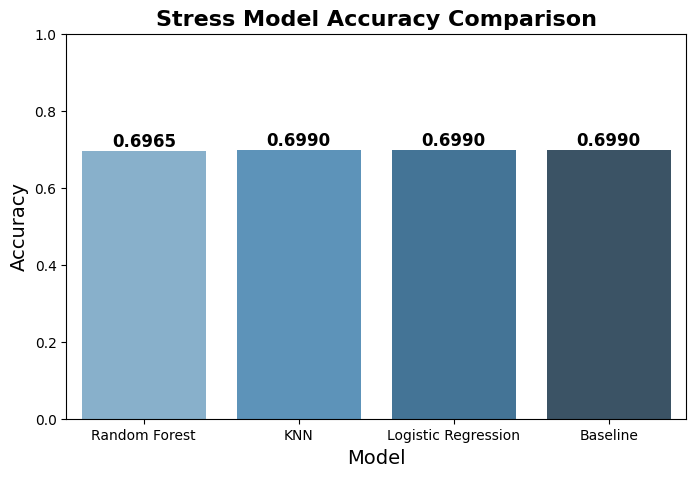

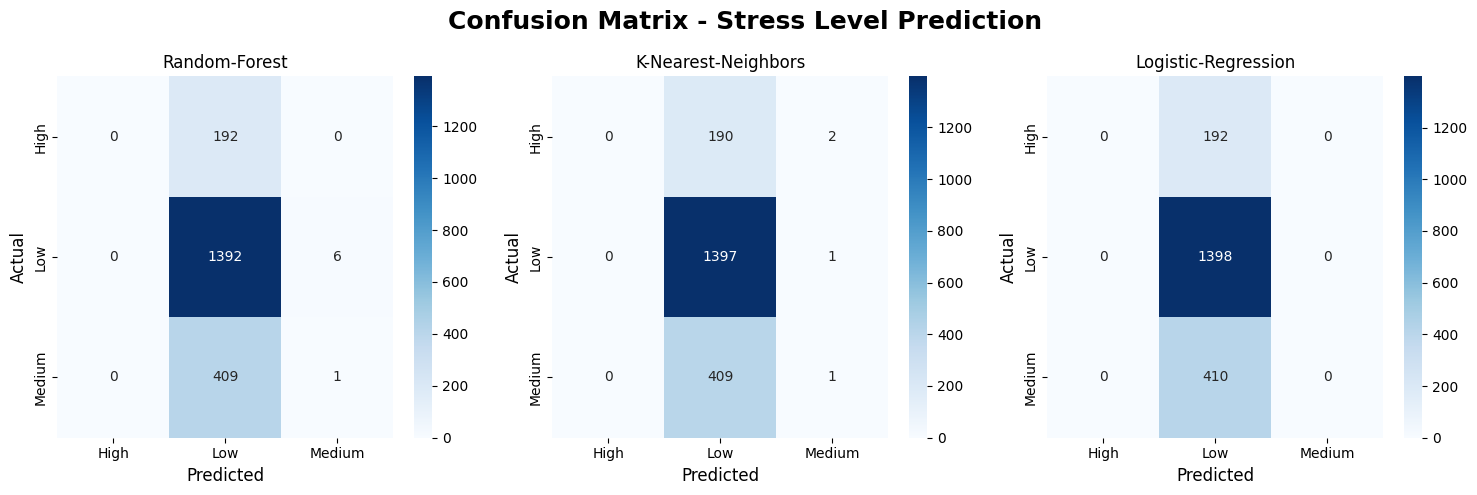


Best Stress Quality Accuracy: KNN - 0.6990


In [190]:
# table with different stress model accuracies
stress_model_accuracies = {
    'Random Forest': rf_accuracy_stress,
    'KNN': knn_accuracy_stress,
    'Logistic Regression': lr_accuracy_stress,
    'Baseline': baseline_accuracy_stress
}


# extract names and values
models = list(stress_model_accuracies.keys())
accuracies = list(stress_model_accuracies.values())

# convert to DataFrame for Seaborn
stress_df_acc = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

# barplot of accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=stress_df_acc, palette='Blues_d')
plt.title('Stress Model Accuracy Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)

# Annotate bars
for i, row in stress_df_acc.iterrows():
    plt.text(i, row.Accuracy + 0.01, f'{row.Accuracy:.4f}',
             ha='center', fontsize=12, fontweight='bold')

plt.show()


print(" ")

fig, axes = plt.subplots(1,3, figsize=(15,5))

# RandomForest confusion matrix
sns.heatmap(rf_cm_stress, annot=True, cmap='Blues', fmt='d',
            xticklabels=['High', 'Low', 'Medium'],
            yticklabels=['High', 'Low', 'Medium'],
            ax=axes[0])
axes[0].set_xlabel('Predicted', fontsize=12)
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_title('Random-Forest')

# KNearestNeighbor confusion matrix
sns.heatmap(knn_cm_stress, annot=True, cmap='Blues', fmt='d',
            xticklabels=['High', 'Low', 'Medium'],
            yticklabels=['High', 'Low', 'Medium'],
            ax=axes[1])
axes[1].set_xlabel('Predicted', fontsize=12)
axes[1].set_ylabel('Actual', fontsize=12)
axes[1].set_title('K-Nearest-Neighbors')

# LogisticRegression confusion matrix
sns.heatmap(lr_cm_stress, annot=True, cmap='Blues', fmt='d',
            xticklabels=['High', 'Low', 'Medium'],
            yticklabels=['High', 'Low', 'Medium'],
            ax=axes[2])
axes[2].set_xlabel('Predicted', fontsize=12)
axes[2].set_ylabel('Actual', fontsize=12)
axes[2].set_title('Logistic-Regression')

plt.suptitle("Confusion Matrix - Stress Level Prediction", y=0.98, fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

best_stress_accuracy = stress_df_acc['Accuracy'].max()
best_stress_accuracy_idx = stress_df_acc['Accuracy'].idxmax()

print(f'\nBest Stress Quality Accuracy: {stress_df_acc['Model'][best_stress_accuracy_idx]} - {best_stress_accuracy:.4f}')



Top 15 Features for Stress Level Prediction:


,Feature,Importance
1,num__Caffeine_mg,0.151927
2,num__BMI,0.137473
4,num__Physical_Activity_Hours,0.134861
3,num__Heart_Rate,0.119941
0,num__Age,0.118241
6,num__Alcohol_Consumption,0.024225
5,num__Smoking,0.019648
7,cat__Gender_Female,0.018421
8,cat__Gender_Male,0.018039
32,cat__Occupation_Other,0.016419


/tmp/ipython-input-4069355939.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=stress_importance_df.head(10), palette='viridis')


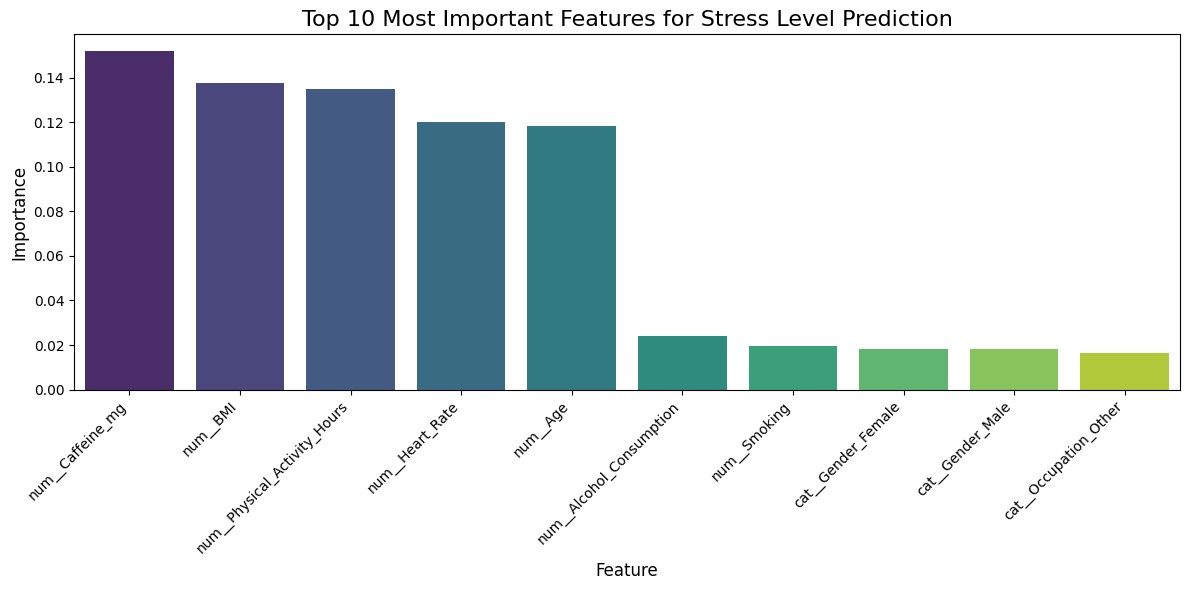

In [191]:
# Get feature importances from the trained most accurate model
stress_feature_importances = rf_classifier_stress.feature_importances_

stress_feature_names = preprocessor_stress.get_feature_names_out()

stress_importance_df = pd.DataFrame({'Feature': stress_feature_names, 'Importance': stress_feature_importances})

stress_importance_df = stress_importance_df.sort_values(by='Importance', ascending=False)

# display the top 15 features
print("\nTop 15 Features for Stress Level Prediction:")
display(stress_importance_df.head(15))

# barplot of top 10 features
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Importance', data=stress_importance_df.head(10), palette='viridis')
plt.title('Top 10 Most Important Features for Stress Level Prediction', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()